# 4 занятие: Библиотеки для анализа данных. Pandas, Matplotlib, Seaborn

## Курс "Машинное обучение", программа AI Masters

## Илья Карчмит, Роман Васильев


В частности, в ноутбуке рассматриваются следующие темы:

* Базовый функционал Pandas. Встроенные функции и типы
* Визуализации: Matplotlib, Seaborn
* Визуализации: оценки времени работы
* Бонусный блок

Установим и обновим требуемые библиотеки до последних версий. Флажок -q (quiet) - не выводить ничего.

In [1]:
!pip install -q --upgrade numpy pandas sklearn pyarrow matplotlib seaborn

Посмотрим версии библиотек

In [2]:
import numpy as np, pandas as pd, pyarrow
import matplotlib, seaborn as sns
import sklearn

for lib in (np, pd, pyarrow, matplotlib, sns, sklearn):
    print(lib.__name__, lib.__version__)

numpy 1.22.4
pandas 1.5.0
pyarrow 9.0.0
matplotlib 3.6.0
seaborn 0.12.0
sklearn 1.0.2


## Quick start в Pandas

<img src="https://pythongis.org/_images/pandas-structures-annotated.png" style="width: 600px">

In [3]:
# pd.Series - набор значений с индексами:
series_without_index = pd.Series([1, 2, 3, 4])
series_with_index = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
series_from_dict = pd.Series({"a": 0.0, "b": 1.0, "c": 2.0}, index=["b", "c", "d", "a", "k"])

from IPython.display import display

display(series_with_index, series_from_dict)

a    0.014645
b    0.933203
c    0.199440
d   -0.229223
e   -0.894500
dtype: float64

b    1.0
c    2.0
d    NaN
a    0.0
k    NaN
dtype: float64

In [4]:
# Над несколькими pd.Series можно совершать операции даже если их индексы отличаются:
series_with_index + series_from_dict

a    0.014645
b    1.933203
c    2.199440
d         NaN
e         NaN
k         NaN
dtype: float64

In [5]:
# с Series можно работать как со столбцом:
print(series_with_index[3]) 

print(series_with_index[[2, 3]])

-0.22922325421200707
c    0.199440
d   -0.229223
dtype: float64


In [6]:
# Сделать срез из Series

# Выбрать конкретные строки:
display(series_with_index[[2, 3]])

# Применить маску:
display(series_with_index[series_with_index > 0])

c    0.199440
d   -0.229223
dtype: float64

a    0.014645
b    0.933203
c    0.199440
dtype: float64

In [7]:
# Применить функцию к pd.Series:

display(series_with_index.apply(lambda x: x + 1))

display(series_with_index.apply(np.sqrt))

def subtract_custom_value(x, custom_value):
    return x - custom_value


display(series_with_index.apply(subtract_custom_value, args=(5,)))

a    1.014645
b    1.933203
c    1.199440
d    0.770777
e    0.105500
dtype: float64

a    0.121017
b    0.966025
c    0.446587
d         NaN
e         NaN
dtype: float64

a   -4.985355
b   -4.066797
c   -4.800560
d   -5.229223
e   -5.894500
dtype: float64

In [8]:
# Агрегация pd.Series: 
display(
    series_with_index.sum(), 
    series_with_index.count(),
    series_with_index.mean(),
    series_with_index.max()
)

0.02356436586553512

5

0.004712873173107024

0.9332034959762228

<img src="https://miro.medium.com/max/1200/1*RSoE6dUr6ApcteKucDoP9A.png" style="width: 600px">

In [9]:
# pd.DataFrame - набор pd.Series с одинаковыми индексами:
series_with_index = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
series_from_dict = pd.Series({"a": 0.0, "b": 1.0, "c": 2.0}, index=["b", "c", "d", "a", "k"])

df_from_dict = pd.DataFrame({'column1': series_with_index, 'column2': series_from_dict})
df_from_dict

column1  column2
a -0.213048      0.0
b -0.689528      1.0
c  0.249464      2.0
d -0.760106      NaN
e  0.139405      NaN
k       NaN      NaN

In [10]:
# Выводим индексы, столбцы и значения:
display(
    df_from_dict.index,
    df_from_dict.columns,
    df_from_dict.values
)

Index(['a', 'b', 'c', 'd', 'e', 'k'], dtype='object')

Index(['column1', 'column2'], dtype='object')

array([[-0.21304782,  0.        ],
       [-0.68952837,  1.        ],
       [ 0.24946411,  2.        ],
       [-0.76010642,         nan],
       [ 0.13940528,         nan],
       [        nan,         nan]])

In [11]:
# И индексы, и столбцы можно менять:
df_from_dict.columns = ['super_column1', 'super_column2'] # еще - df.rename
df_from_dict.index = np.arange(len(df_from_dict)) * 10 # еще - df.set_index
df_from_dict

super_column1  super_column2
0       -0.213048            0.0
10      -0.689528            1.0
20       0.249464            2.0
30      -0.760106            NaN
40       0.139405            NaN
50            NaN            NaN

In [12]:
# Выбор строчки по индексу/номеру строки:
display(
    df_from_dict.loc[10],
    df_from_dict.iloc[2]
)

super_column1   -0.689528
super_column2    1.000000
Name: 10, dtype: float64

super_column1    0.249464
super_column2    2.000000
Name: 20, dtype: float64

In [13]:
# Агрегация: 
display(
    df_from_dict.sum(axis = 1),
    df_from_dict.sum(axis = 0)
)

0    -0.213048
10    0.310472
20    2.249464
30   -0.760106
40    0.139405
50    0.000000
dtype: float64

super_column1   -1.273813
super_column2    3.000000
dtype: float64

## Загрузка данных с помощью pandas

### Titanic

Говорим про: 
- Чтение из csv
- Прописывание типов и индексов
- `pd.concat`

In [14]:
ttn_tr = pd.read_csv('titanic/train.csv')

ttn_tr.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [15]:
ttn_tr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


In [16]:
ttn_tr.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [17]:
ttn_tr.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [18]:
for col in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    ttn_tr[col] = ttn_tr[col].astype('category')
    
ttn_tr['Survived'] = ttn_tr['Survived'].astype('int8')
ttn_tr.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int8    
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    category
 7   Parch        891 non-null    category
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(1), int8(1), object(3)
memory usage: 189.6 KB


In [19]:
# Читать DataFrame можно сразу в верном формате и экономя память:
ttn_tr = pd.read_csv('titanic/train.csv', 
                     index_col = 'PassengerId', 
                     dtype={'Survived':"int8", 
                            'Pclass':"category",
                            'Sex': "category",
                            'SibSp': "category",
                            'Parch': "category",
                            'Embarked': "category"}
                    )

ttn_tr.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int8    
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(5), float64(2), int8(1), object(3)
memory usage: 190.3 KB


In [20]:
# pd.concat = "слепить" датафреймы

ttn_tst = pd.read_csv('titanic/test.csv', 
                      dtype={'Pclass':"category",
                            'Sex': "category",
                            'SibSp': "category",
                            'Parch': "category",
                            'Embarked': "category"}
                      )

ttn_global = pd.concat(
    [ttn_tr.assign(data_class='train'), ttn_tst.assign(data_class='test')],
    axis=0,
    sort=False,
    ignore_index=True
)

ttn_global

Survived Pclass                                               Name  \
0          0.0      3                            Braund, Mr. Owen Harris   
1          1.0      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2          1.0      3                             Heikkinen, Miss. Laina   
3          1.0      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4          0.0      3                           Allen, Mr. William Henry   
...        ...    ...                                                ...   
1304       NaN      3                                 Spector, Mr. Woolf   
1305       NaN      1                       Oliva y Ocana, Dona. Fermina   
1306       NaN      3                       Saether, Mr. Simon Sivertsen   
1307       NaN      3                                Ware, Mr. Frederick   
1308       NaN      3                           Peter, Master. Michael J   

         Sex   Age SibSp Parch              Ticket      Fare Cabin Embarked  \
0       male  22.0     1     0           A/5 21171    7.2500   NaN        S   
1     female  38.0     1     0            PC 17599   71.2833   C85        C   
2     female  26.0     0     0    STON/O2. 3101282    7.9250   NaN        S   
3     female  35.0     1     0              113803   53.1000  C123        S   
4       male  35.0     0     0              373450    8.0500   NaN        S   
...      ...   ...   ...   ...                 ...       ...   ...      ...   
1304    male   NaN     0     0           A.5. 3236    8.0500   NaN        S   
1305  female  39.0     0     0            PC 17758  108.9000  C105        C   
1306    male  38.5     0     0  SOTON/O.Q. 3101262    7.2500   NaN        S   
1307    male   NaN     0     0              359309    8.0500   NaN        S   
1308    male   NaN     1     1                2668   22.3583   NaN        C   

     data_class  PassengerId  
0         train          NaN  
1         train          NaN  
2         train          NaN  
3         train          NaN  
4         train          NaN  
...         ...          ...  
1304       test       1305.0  
1305       test       1306.0  
1306       test       1307.0  
1307       test       1308.0  
1308       test       1309.0  

[1309 rows x 13 columns]

Иногда экономия места бывает куда более существенна:


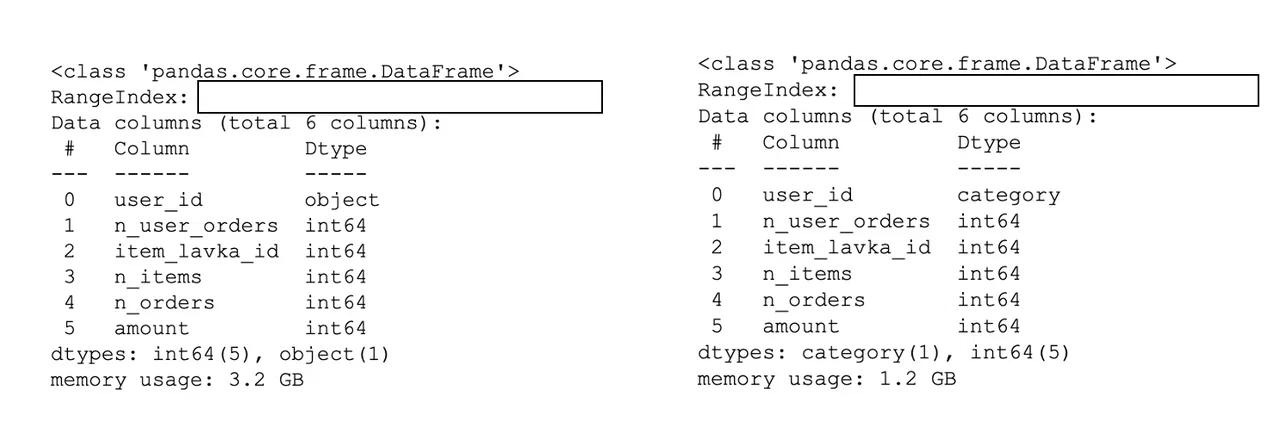


In [27]:
# pd.Series.apply: для примнения функций к столбцам
ttn_global['Sex_new'] = ttn_global['Sex'].apply(lambda x: 1 if x == 'male' else 0)
ttn_global['Sex_new'].value_counts()

1    843
0    466
Name: Sex_new, dtype: int64

Использование типов данных из Pandas открывает перед вами широкие возможности (`.str`, `.cat`, `.dt`):

In [28]:
# pd.Series.str: векторизация строковых функций
ttn_global['Short_name'] = ttn_global['Name'].str.split(",").str[0]
ttn_global['First_symb_name'] = ttn_global['Name'].str.get(0)
ttn_global['Short_name'] = ttn_global['Short_name'].str.upper()

ttn_global[ttn_global['Name'].str.contains('Mrs')].head()

Survived Pclass                                               Name  \
1        1.0      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
3        1.0      1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
8        1.0      3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9        1.0      2                Nasser, Mrs. Nicholas (Adele Achem)   
15       1.0      2                   Hewlett, Mrs. (Mary D Kingcome)    

       Sex   Age SibSp Parch    Ticket     Fare Cabin Embarked data_class  \
1   female  38.0     1     0  PC 17599  71.2833   C85        C      train   
3   female  35.0     1     0    113803  53.1000  C123        S      train   
8   female  27.0     0     2    347742  11.1333   NaN        S      train   
9   female  14.0     1     0    237736  30.0708   NaN        C      train   
15  female  55.0     0     0    248706  16.0000   NaN        S      train   

    PassengerId Sex_new Short_name First_symb_name  
1           NaN       0    CUMINGS               C  
3           NaN       0   FUTRELLE               F  
8           NaN       0    JOHNSON               J  
9           NaN       0     NASSER               N  
15          NaN       0    HEWLETT               H

In [29]:
# pd.Series.cat: работа с категориями:
ttn_global['Pclass'].cat.categories
ttn_global['Pclass'].cat.rename_categories(list("abc"))
ttn_global['Pclass'].cat.add_categories(["d", "e"])
ttn_global['Embarked'].cat.codes

0       2
1       0
2       2
3       2
4       2
       ..
1304    2
1305    0
1306    2
1307    2
1308    0
Length: 1309, dtype: int8

### Predict future sales

Говорим про:
- datetime 
- merge 
- group by & простые агрегации

In [30]:
%%time
sales_train = pd.read_csv('future_sales/sales_train.csv')
sales_test = pd.read_csv('future_sales/test.csv')
sales_train.head(3)

CPU times: user 977 ms, sys: 203 ms, total: 1.18 s
Wall time: 1.19 s


date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154       999.0           1.0
1  03.01.2013               0       25     2552       899.0           1.0
2  05.01.2013               0       25     2552       899.0          -1.0

In [31]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format='%d.%m.%Y')
sales_train.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0 2013-01-02               0       59    22154      999.00           1.0
1 2013-01-03               0       25     2552      899.00           1.0
2 2013-01-05               0       25     2552      899.00          -1.0
3 2013-01-06               0       25     2554     1709.05           1.0
4 2013-01-15               0       25     2555     1099.00           1.0

In [32]:
sales_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


Работа напрямую через datetime позволяет избежать множества костылей. 
"Справочник" по `.dt`: https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dt-accessor

In [33]:
sales_train['date'].dt.day
sales_train['date'].dt.month
sales_train['date'].dt.is_month_start
sales_train['date'].dt.dayofweek

0          2
1          3
2          5
3          6
4          1
          ..
2935844    5
2935845    4
2935846    2
2935847    3
2935848    5
Name: date, Length: 2935849, dtype: int64

In [34]:
items = pd.read_csv('future_sales/items.csv')
item_categories = pd.read_csv('future_sales/item_categories.csv')
shops = pd.read_csv('future_sales/shops.csv')


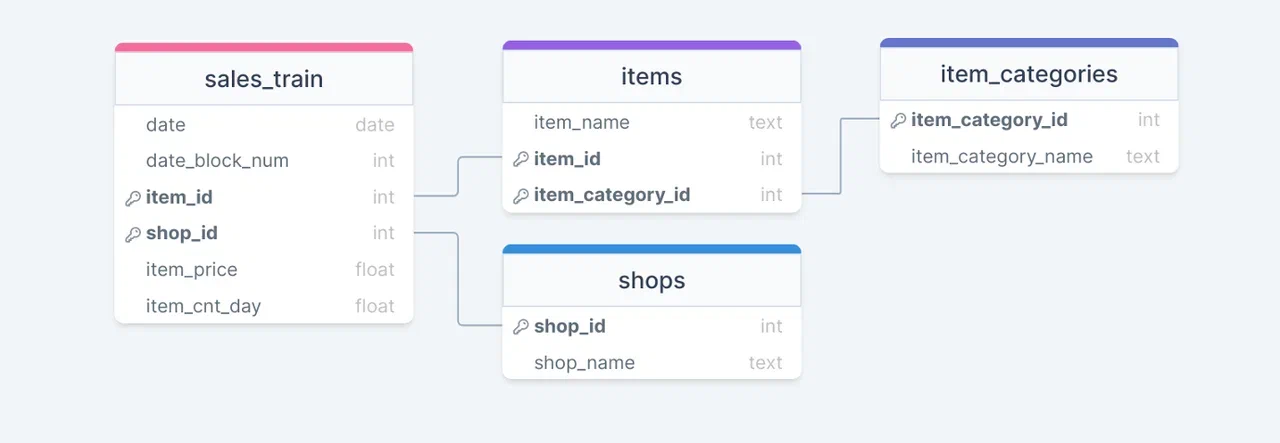


In [36]:
sales_tr = (
    sales_train
    .merge(items, on='item_id')
    .merge(item_categories, on='item_category_id')
    .merge(shops, on='shop_id')
)

sales_tst = (
    sales_test
    .merge(items, on='item_id')
    .merge(item_categories, on='item_category_id')
    .merge(shops, on='shop_id')
)

sales_global = pd.concat(
    [sales_tr.assign(data_class='train'), sales_tst.assign(data_class='test')],
    axis=0,
    sort=False,
    ignore_index=True
)

sales_global.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02             0.0       59    22154       999.0           1.0   
1 2013-04-26             3.0       59      944       150.0           1.0   
2 2013-06-26             5.0       59      944       199.5           1.0   
3 2013-07-20             6.0       59      944       199.5           1.0   
4 2013-09-14             8.0       59      944       299.0           2.0   

           item_name  item_category_id item_category_name  \
0  ЯВЛЕНИЕ 2012 (BD)                37     Кино - Blu-Ray   
1          2012 (BD)                37     Кино - Blu-Ray   
2          2012 (BD)                37     Кино - Blu-Ray   
3          2012 (BD)                37     Кино - Blu-Ray   
4          2012 (BD)                37     Кино - Blu-Ray   

                shop_name data_class  ID  
0  Ярославль ТЦ "Альтаир"      train NaN  
1  Ярославль ТЦ "Альтаир"      train NaN  
2  Ярославль ТЦ "Альтаир"      train NaN  
3  Ярославль ТЦ "Альтаир"      train NaN  
4  Ярославль ТЦ "Альтаир"      train NaN

In [37]:
sales_global.shop_name.value_counts().head()

Москва ТЦ "Семеновский"            240736
Москва ТРК "Атриум"                191204
Москва ТЦ "МЕГА Теплый Стан" II    147334
Химки ТЦ "Мега"                    143480
Якутск Орджоникидзе, 56            122528
Name: shop_name, dtype: int64


    
<img src="https://miro.medium.com/max/1400/0*Z4rGZFc-KBPVItZi.png" style="width: 800px">


In [38]:
(
    sales_global
    .groupby('item_name')
    .agg({'item_cnt_day': 'sum'})
    # .reset_index()
    # .rename(columns={'item_cnt_day': 'items_saled'})\
    # .sort_values(by='items_saled', ascending = False)\
    # .head()
)

item_cnt_day
item_name                                                       
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D                    1.0
!ABBYY FineReader 12 Professional Edition Full ...           6.0
***В ЛУЧАХ СЛАВЫ   (UNV)                    D                2.0
***ГОЛУБАЯ ВОЛНА  (Univ)                      D              2.0
***КОРОБКА (СТЕКЛО)                       D                  1.0
...                                                          ...
Ядерный титбит 2 [PC, Цифровая версия]                       2.0
Язык запросов 1С:Предприятия  [Цифровая версия]            348.0
Язык запросов 1С:Предприятия 8 (+CD). Хрусталев...        1320.0
Яйцо для Little Inu                                          6.0
Яйцо дракона (Игра престолов)                                1.0

[22170 rows x 1 columns]

In [39]:
(
    sales_global
    .assign(sales_rub = sales_global.item_price * sales_global.item_cnt_day)
    .groupby('shop_name')
    .agg({'sales_rub': np.sum, 'item_name': pd.Series.nunique})
    .reset_index()
    .rename(columns={'sales_rub': 'sales_sum', 'item_name': 'sku_unique'})
    .sort_values(by='sales_sum', ascending = False)
    .head()
)

shop_name     sales_sum  sku_unique
31          Москва ТЦ "Семеновский"  2.352170e+08       15594
25              Москва ТРК "Атриум"  2.164806e+08       16454
28  Москва ТЦ "МЕГА Теплый Стан" II  1.597463e+08       14052
42           СПб ТК "Невский Центр"  1.519170e+08       13430
54                  Химки ТЦ "Мега"  1.419397e+08       13863

### Итого, имеем два датасета - маленький Titanic и большой Future sales

In [40]:
print(ttn_global.shape[0])
ttn_global.head(3)

1309


Survived Pclass                                               Name     Sex  \
0       0.0      3                            Braund, Mr. Owen Harris    male   
1       1.0      1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2       1.0      3                             Heikkinen, Miss. Laina  female   

    Age SibSp Parch            Ticket     Fare Cabin Embarked data_class  \
0  22.0     1     0         A/5 21171   7.2500   NaN        S      train   
1  38.0     1     0          PC 17599  71.2833   C85        C      train   
2  26.0     0     0  STON/O2. 3101282   7.9250   NaN        S      train   

   PassengerId Sex_new Short_name First_symb_name  
0          NaN       1     BRAUND               B  
1          NaN       0    CUMINGS               C  
2          NaN       0  HEIKKINEN               H

In [41]:
print(sales_global.shape[0])
sales_global.head(3)

3150049


date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0 2013-01-02             0.0       59    22154       999.0           1.0   
1 2013-04-26             3.0       59      944       150.0           1.0   
2 2013-06-26             5.0       59      944       199.5           1.0   

           item_name  item_category_id item_category_name  \
0  ЯВЛЕНИЕ 2012 (BD)                37     Кино - Blu-Ray   
1          2012 (BD)                37     Кино - Blu-Ray   
2          2012 (BD)                37     Кино - Blu-Ray   

                shop_name data_class  ID  
0  Ярославль ТЦ "Альтаир"      train NaN  
1  Ярославль ТЦ "Альтаир"      train NaN  
2  Ярославль ТЦ "Альтаир"      train NaN

## Matplotlib intro

Туториал https://matplotlib.org/stable/tutorials/

- fig, ax и pyplot интерфейсы
- `plt.subplots` и `plt.subplot_mosaic`.
  


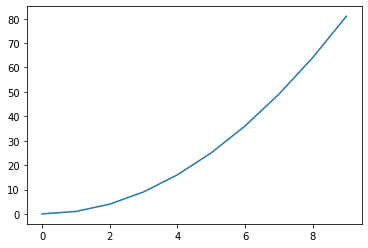

In [42]:
import matplotlib.pyplot as plt

plt.plot(np.arange(10) ** 2)
plt.show()

или

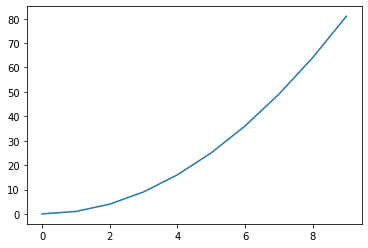

In [43]:
fig, ax = plt.subplots()
ax.plot(np.arange(10) ** 2)
plt.show()

`plt.subplots` и `plt.subplot_mosaic` - два основных способа создать "пустой мольберт" с фиксированной структурой

- `plt.subplots`

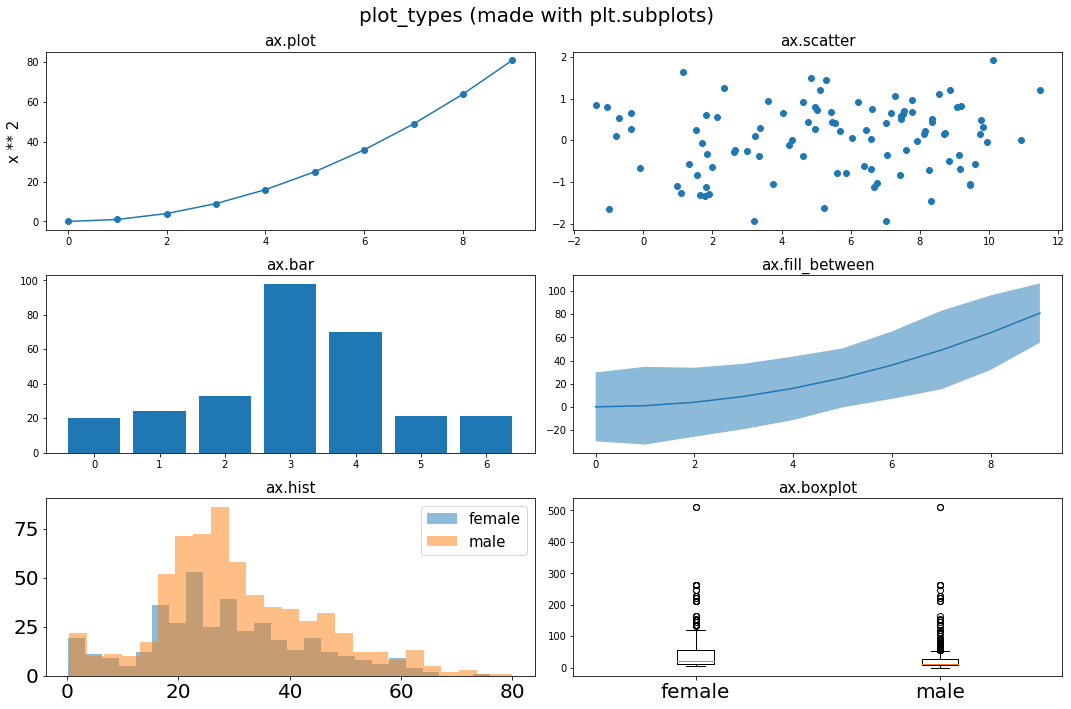

In [44]:
n = 100
array_for_lines = np.arange(10) ** 2
std_for_lines = np.random.randint(10, 40) + 3 * np.random.normal(size=10)
data_for_scatter = np.random.randint(low=0, high=11, size=n) + np.random.normal(size=n), np.random.normal(size=n)
data_for_bar = np.arange(7), np.random.randint(low=10, high=100, size=7)

fig, ax = plt.subplots(3, 2)
ax[0, 0].plot(array_for_lines, marker='o')
ax[0, 0].set_title('ax.plot', fontsize=15)
ax[0, 0].set_ylabel('x ** 2', fontsize=15)


ax[0, 1].scatter(*data_for_scatter)
ax[0, 1].set_title('ax.scatter', fontsize=15)

ax[1, 0].bar(*data_for_bar)
ax[1, 0].set_title('ax.bar', fontsize=15)

ax[1, 1].plot(array_for_lines)
ax[1, 1].fill_between(np.arange(10), y1=array_for_lines + std_for_lines, y2=array_for_lines - std_for_lines, alpha=0.5)
ax[1, 1].set_title('ax.fill_between', fontsize=15)

ax[2, 0].hist(ttn_global[ttn_global.Sex == 'female'].Age, bins=25, alpha=0.5, label='female')
ax[2, 0].hist(ttn_global[ttn_global.Sex == 'male'].Age, bins=25, alpha=0.5, label='male')
ax[2, 0].set_title('ax.hist', fontsize=15)
ax[2, 0].legend(fontsize=15)
ax[2, 0].tick_params(axis='both', labelsize=20)

data_for_boxplot = [ttn_global[ttn_global.Sex == 'female'].Fare.dropna(),
                    ttn_global[ttn_global.Sex == 'male'].Fare.dropna()]
ax[2, 1].boxplot(data_for_boxplot, labels=['female', 'male'])
ax[2, 1].set_title('ax.boxplot', fontsize=15)
ax[2, 1].tick_params(axis='x', labelsize=20)

fig.suptitle('plot_types (made with plt.subplots)', fontsize=20)
fig.set_size_inches(15, 10)
fig.tight_layout()

plt.show()

- `plt.subplot_mosaic`

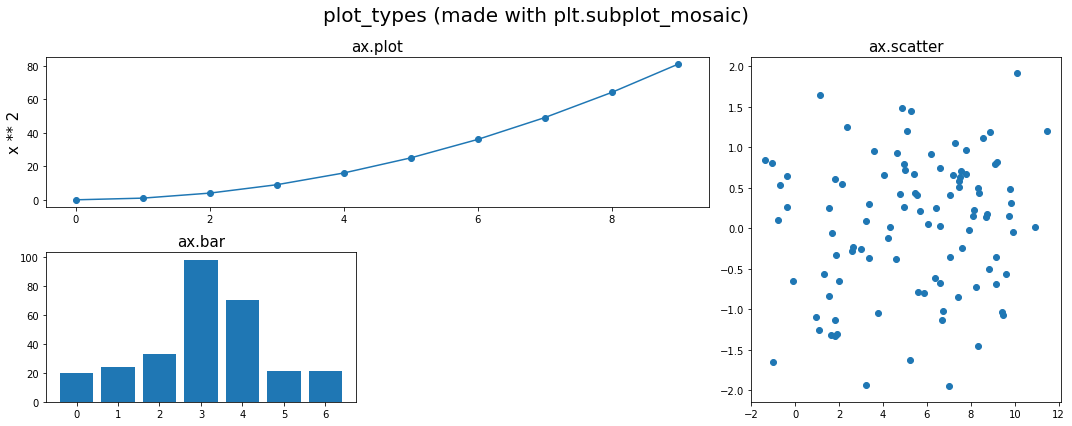

In [45]:
mosaic = '''
PPS
B.S
'''
fig, ax = plt.subplot_mosaic(mosaic=mosaic)

ax['P'].plot(array_for_lines, marker='o')
ax['P'].set_title('ax.plot', fontsize=15)
ax['P'].set_ylabel('x ** 2', fontsize=15)


ax['S'].scatter(*data_for_scatter)
ax['S'].set_title('ax.scatter', fontsize=15)

ax['B'].bar(*data_for_bar)
ax['B'].set_title('ax.bar', fontsize=15)

fig.suptitle('plot_types (made with plt.subplot_mosaic)', fontsize=20)
fig.set_size_inches(15, 6)
fig.tight_layout()

plt.show()

Пара слов о `pyplot`:

`pyplot` умеет рисовать только в "текущие" `fig`, `ax` (`plt.gcf()`, `plt.gca()` - get current figure, get current axes).
Переключать "текущие" `fig`, `ax` с одних на другие можно с помощью `plt.subplot` (не путать с `plt.subplots`!).

matplotlib также умеет выводить картинки, добавлять текстовые аннотации, строить 3d-графики...

## seaborn intro

Туториал https://seaborn.pydata.org/tutorial.html

  seaborn работает поверх matplotlib, дружит с pandas. Есть два интерфейса общения с библиотекой - отрисовка функциями и объектный интерфейс (добавили в сентябре 2022). Рассмотрим в рамках семинара функциональный интерфейс.

- ### Relational plots

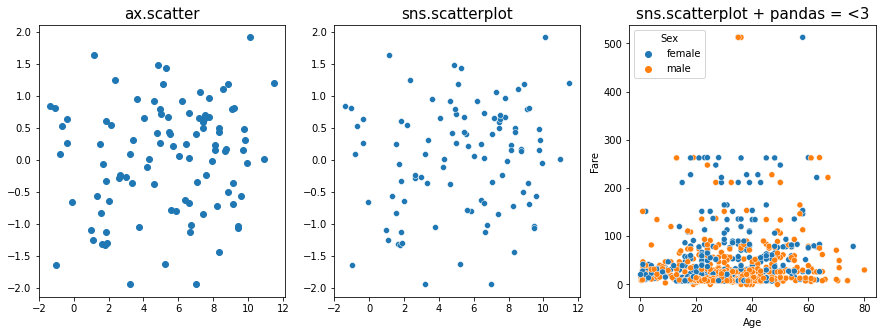

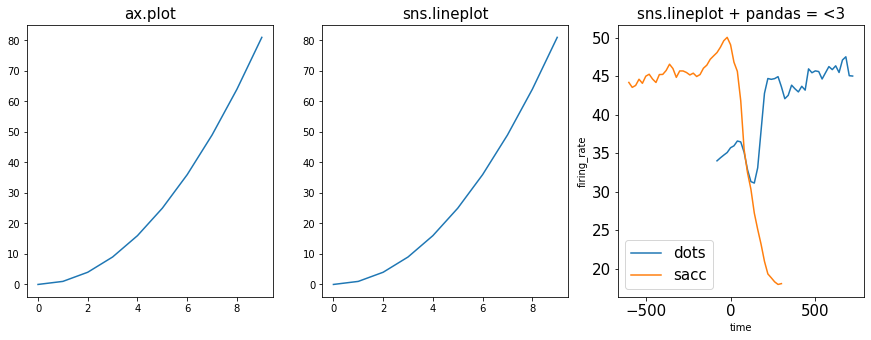

In [46]:
# scatterplot

fig, ax = plt.subplot_mosaic('abc')
ax['a'].scatter(*data_for_scatter)
ax['a'].set_title('ax.scatter', fontsize=15)

sns.scatterplot(x=data_for_scatter[0], y=data_for_scatter[1], ax=ax['b'])
ax['b'].set_title('sns.scatterplot', fontsize=15)

sns.scatterplot(data=ttn_global, x='Age', y='Fare', hue='Sex', ax=ax['c'])
ax['c'].set_title('sns.scatterplot + pandas = <3', fontsize=15)

fig.set_size_inches(15, 5)

plt.show()

# lineplot

fig, ax = plt.subplot_mosaic('abc')
ax['a'].plot(array_for_lines)
ax['a'].set_title('ax.plot', fontsize=15)

sns.lineplot(x=np.arange(10), y=array_for_lines, ax=ax['b'], n_boot=0, errorbar=None)
ax['b'].set_title('sns.lineplot', fontsize=15)

data_dots = sns.load_dataset('dots')
sns.lineplot(data=data_dots, x='time', y='firing_rate',
            hue='align', ax=ax['c'], n_boot=0, errorbar=None)
ax['c'].set_title('sns.lineplot + pandas = <3', fontsize=15)
ax['c'].tick_params(axis='both', labelsize=15)
ax['c'].legend(fontsize=15)

fig.set_size_inches(15, 5)

plt.show()

In [47]:
data_dots.head()

align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487

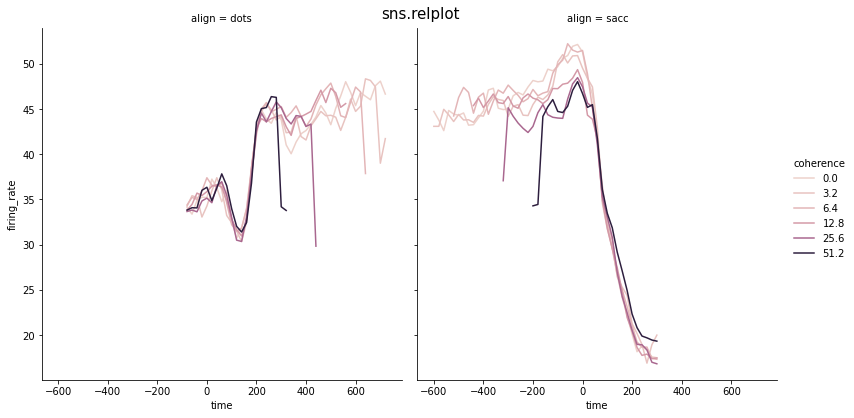

In [48]:
facetGrid = sns.relplot(data=data_dots, x='time', y='firing_rate',
            hue='coherence', errorbar=None,
           
           kind='line', col='align')

# cur_ax = facetGrid.axes[0, 0]
# cur_ax.set_title(cur_ax.get_title(), fontsize=15)
# cur_ax = facetGrid.axes[0, 1]
# cur_ax.set_title(cur_ax.get_title(), fontsize=15)

plt.gcf().suptitle('sns.relplot', fontsize=15)
plt.gcf().set_size_inches(12, 6)

- ### Distribution plots

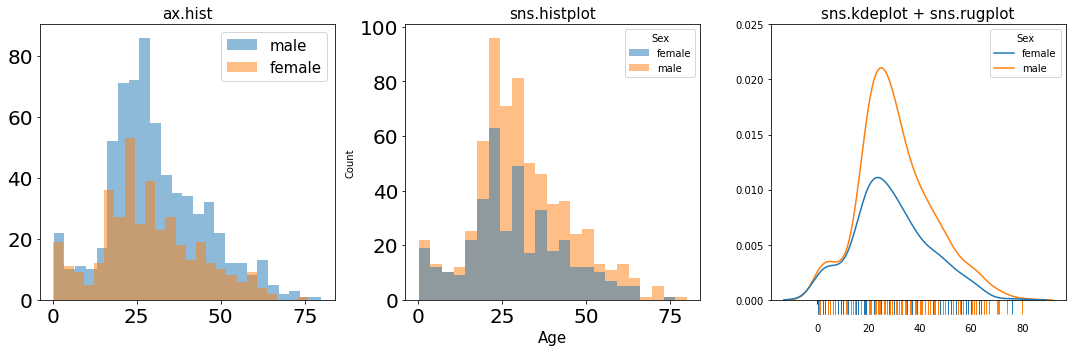

In [49]:
fig, ax = plt.subplot_mosaic('abc')
ax['a'].hist(ttn_global[ttn_global.Sex == 'male'].Age, bins=25, alpha=0.5, label='male')
ax['a'].hist(ttn_global[ttn_global.Sex == 'female'].Age, bins=25, alpha=0.5, label='female')
ax['a'].set_title('ax.hist', fontsize=15)
ax['a'].legend(fontsize=15)
ax['a'].tick_params(axis='both', labelsize=20)

sns.histplot(data=ttn_global, x='Age', hue='Sex', linewidth=0, alpha=0.5, ax=ax['b'])
ax['b'].set_title('sns.histplot', fontsize=15)
ax['b'].tick_params(axis='both', labelsize=20)
ax['b'].set_xlabel(ax['b'].get_xlabel(), fontsize=15)

sns.kdeplot(data=ttn_global, x='Age', hue='Sex', ax=ax['c'])
sns.rugplot(data=ttn_global, x='Age', hue='Sex', ax=ax['c'], height=-0.05, clip_on=False)
ax['c'].set_title('sns.kdeplot + sns.rugplot', fontsize=15)
ax['c'].tick_params(axis='x', pad=20)
ax['c'].set_xlabel('')
ax['c'].set_ylabel('')
ax['c'].set_ylim(0, 0.025)

fig.set_size_inches(15, 5)
fig.tight_layout()

plt.show()

- ### Categorical plots

/Users/ravasiliev/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ravasiliev/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


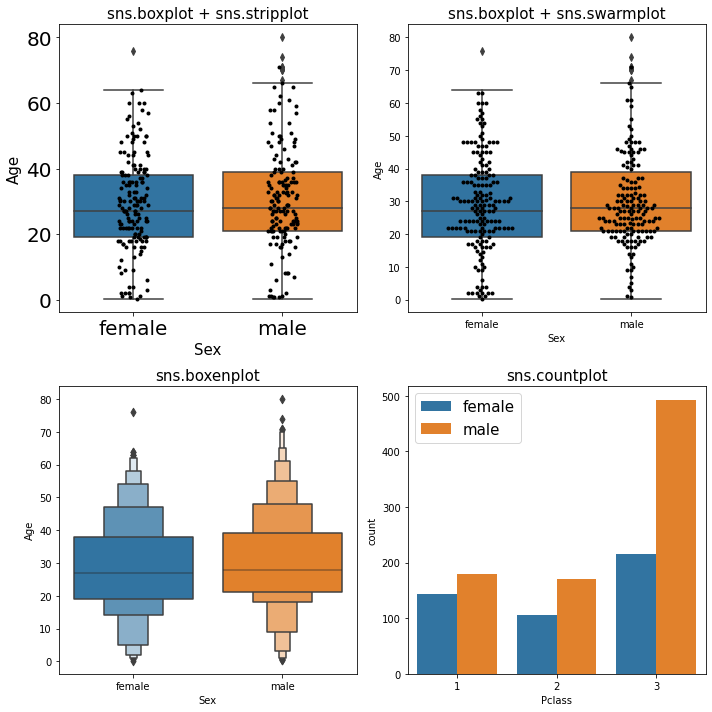

In [50]:
mosaic = '''
ab
cd
'''

fig, ax = plt.subplot_mosaic(mosaic)
sns.boxplot(data=ttn_global, y='Age', x='Sex', ax=ax['a'])
sns.stripplot(data=ttn_global.groupby('Sex').sample(200), y='Age', x='Sex', ax=ax['a'], color='black', size=4)
ax['a'].set_title('sns.boxplot + sns.stripplot', fontsize=15)
ax['a'].tick_params(axis='both', labelsize=20)
ax['a'].set_xlabel(ax['a'].get_xlabel(), fontsize=15)
ax['a'].set_ylabel(ax['a'].get_ylabel(), fontsize=15)

sns.boxplot(data=ttn_global, y='Age', x='Sex', ax=ax['b'])
sns.swarmplot(data=ttn_global.groupby('Sex').sample(200), y='Age', x='Sex', ax=ax['b'], color='black', size=4)
ax['b'].set_title('sns.boxplot + sns.swarmplot', fontsize=15)


sns.boxenplot(data=ttn_global, y='Age', x='Sex', ax=ax['c'])
ax['c'].set_title('sns.boxenplot', fontsize=15)

sns.countplot(data=ttn_global, x='Pclass', hue='Sex', ax=ax['d'])
ax['d'].set_title('sns.countplot', fontsize=15)
ax['d'].legend(fontsize=15)

fig.set_size_inches(10, 10)
fig.tight_layout()

plt.show()

## Некоторые заметки на полях

#### Время построение графиков в зависимости от размера выборки

In [51]:
from sklearn.datasets import make_blobs

df, _ = make_blobs(n_samples=int(3e6), n_features=2)
df = pd.DataFrame(df, columns=['feature_1', 'feature_2'])
df['time'] = np.arange(df.shape[0])
df['cat_feature'] = np.random.randint(0, 8, df.shape[0])
df['target'] = np.random.randint(0, 2, df.shape[0])

df.head()

feature_1  feature_2  time  cat_feature  target
0  -9.120586  -9.131196     0            3       1
1  -7.710087  -7.430621     1            0       0
2  -8.684881  -9.966972     2            2       0
3  -6.864951  -9.883758     3            6       1
4   2.689240  -9.901442     4            0       1

sns.lineplot


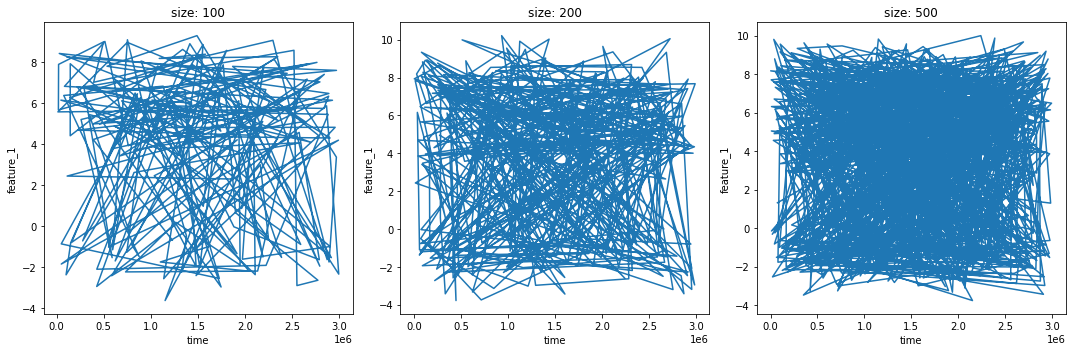

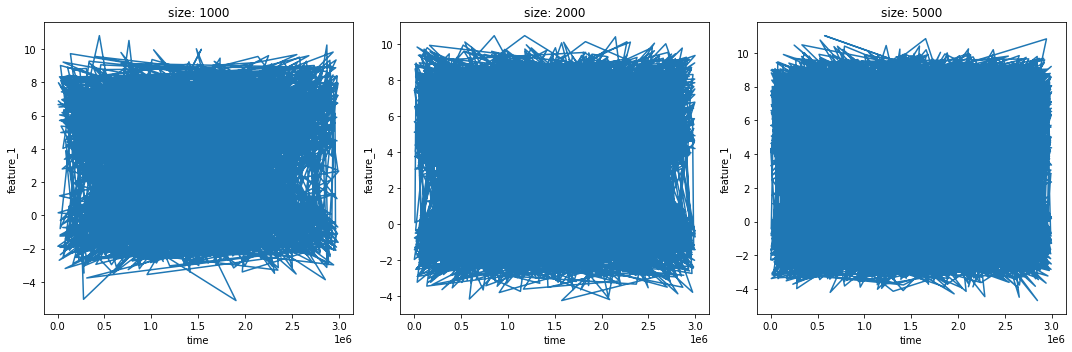

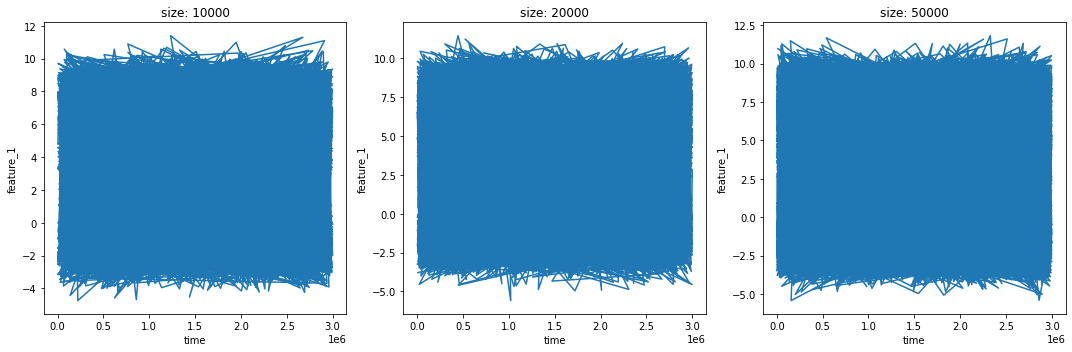

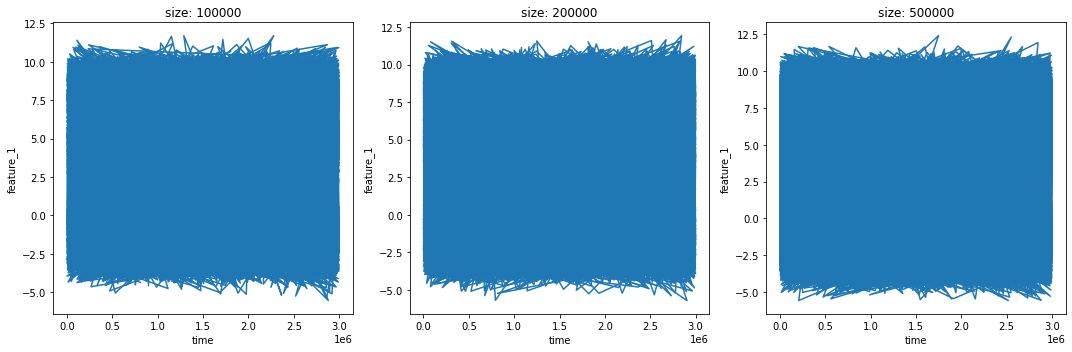

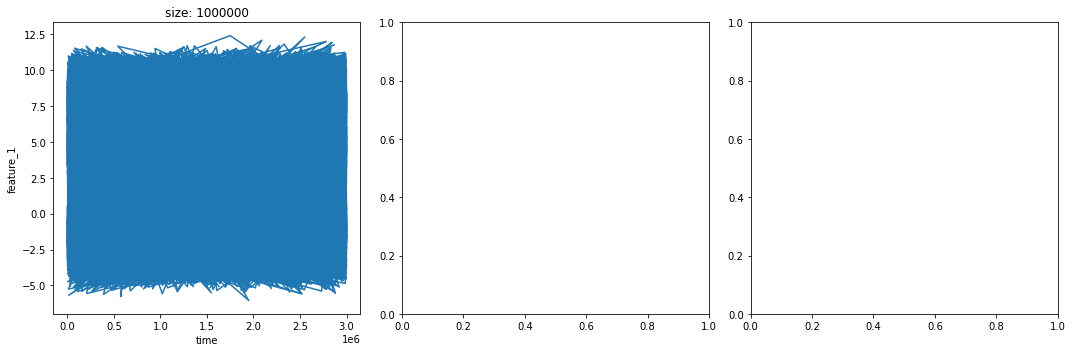

sns.scatterplot


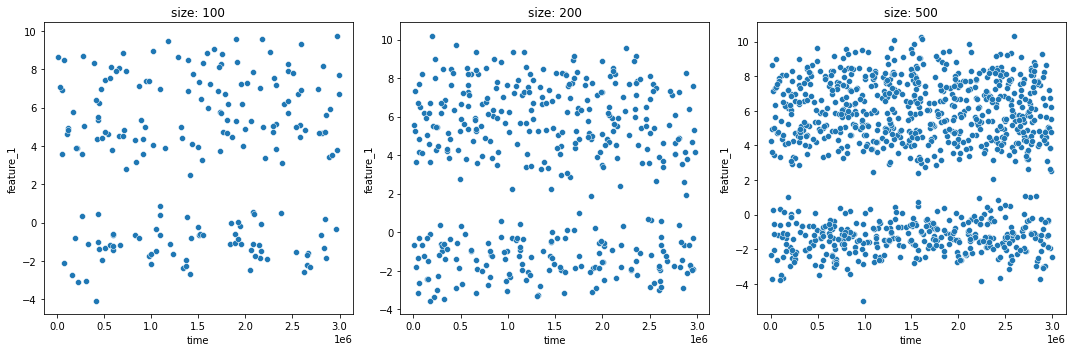

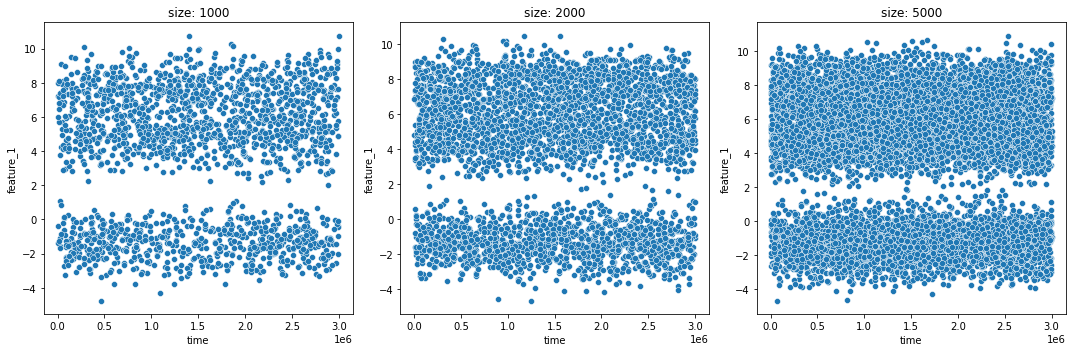

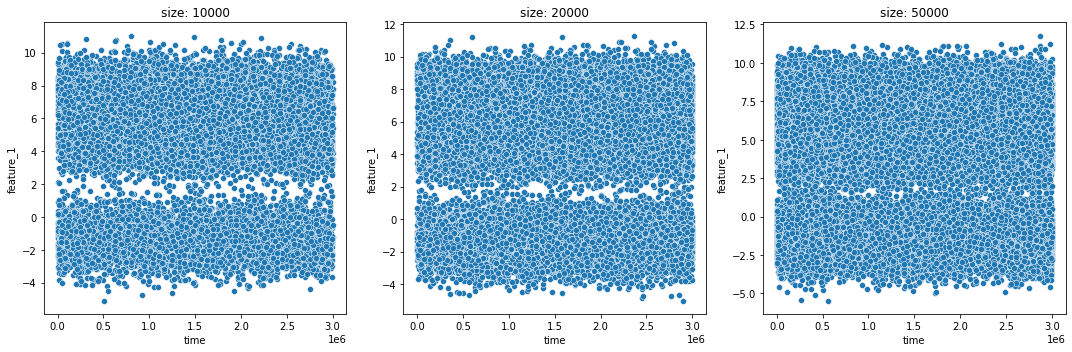

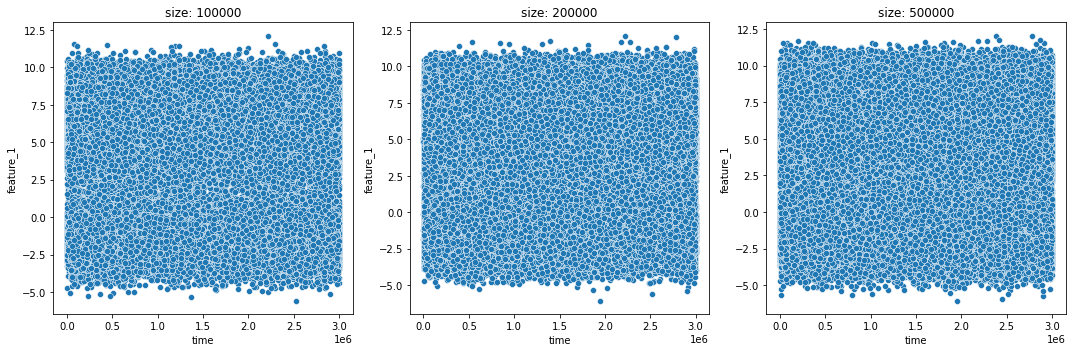

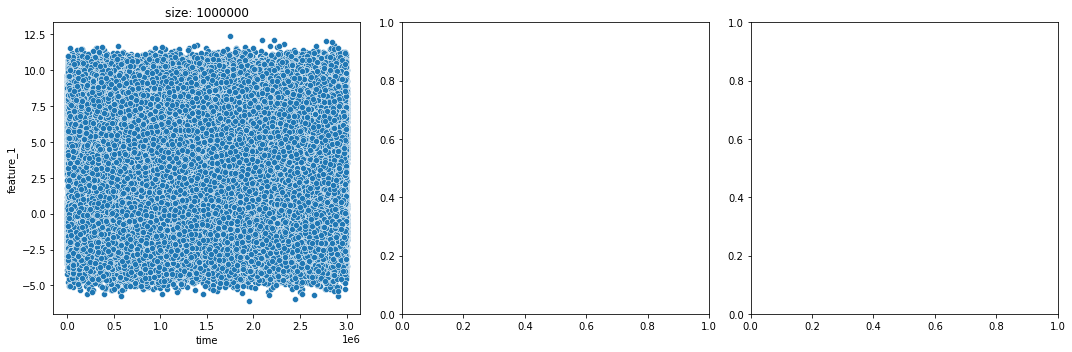

sns.histplot


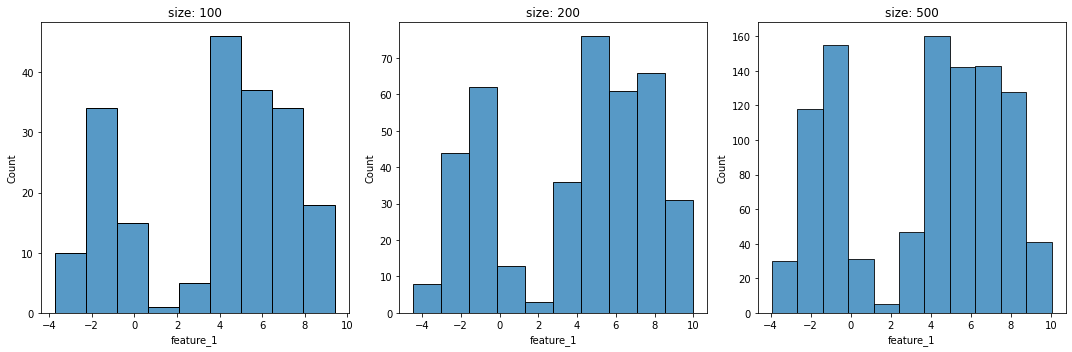

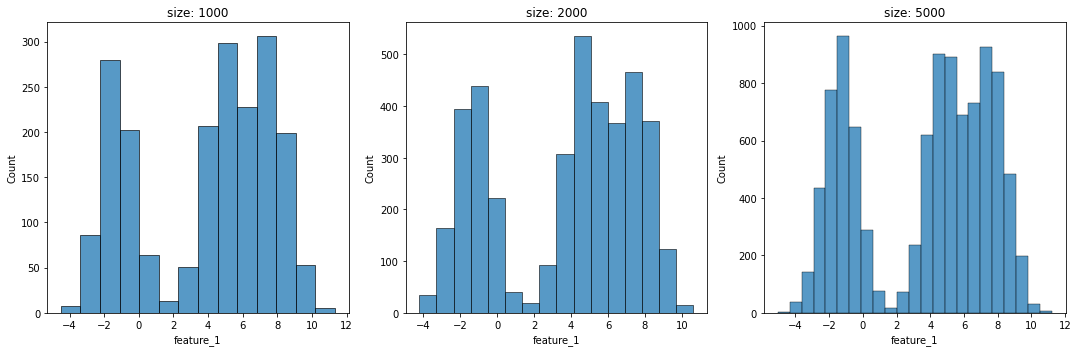

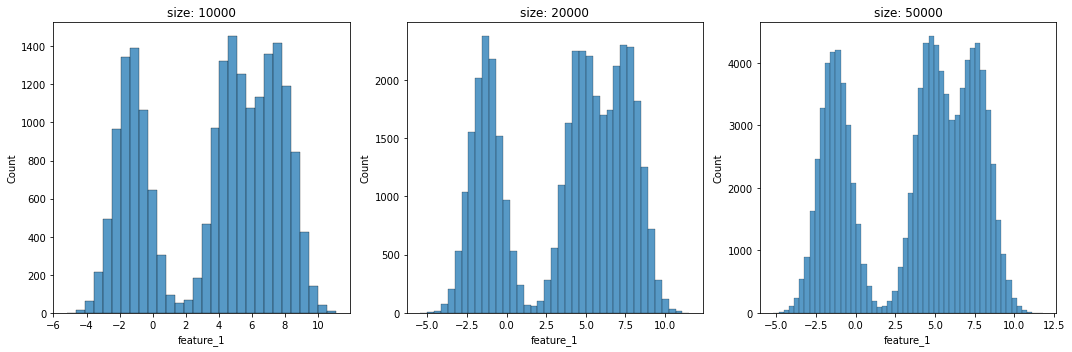

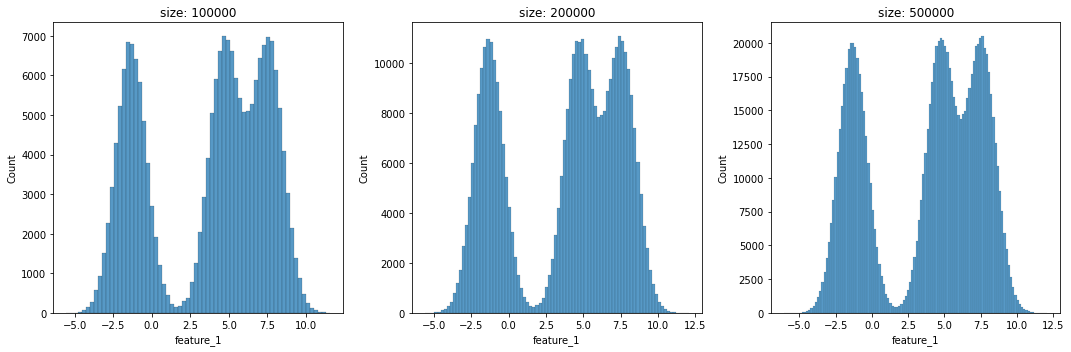

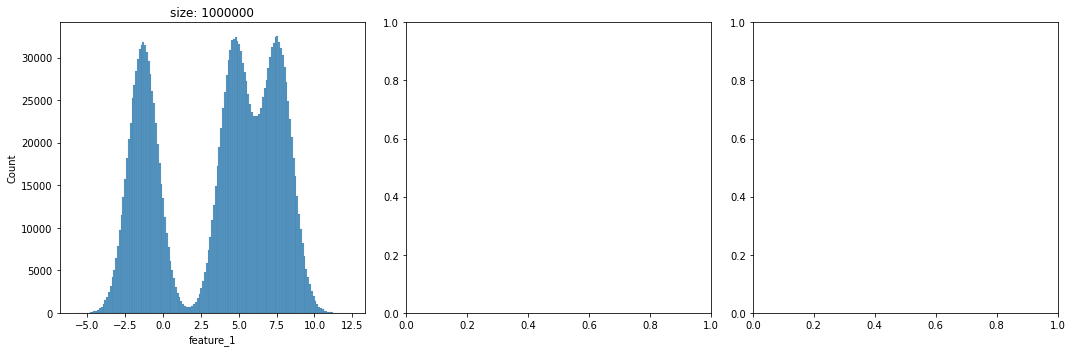

sns.histplot + kde


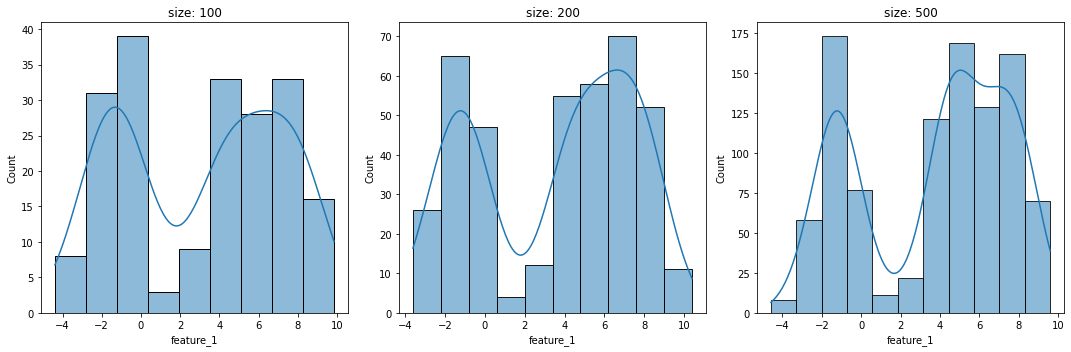

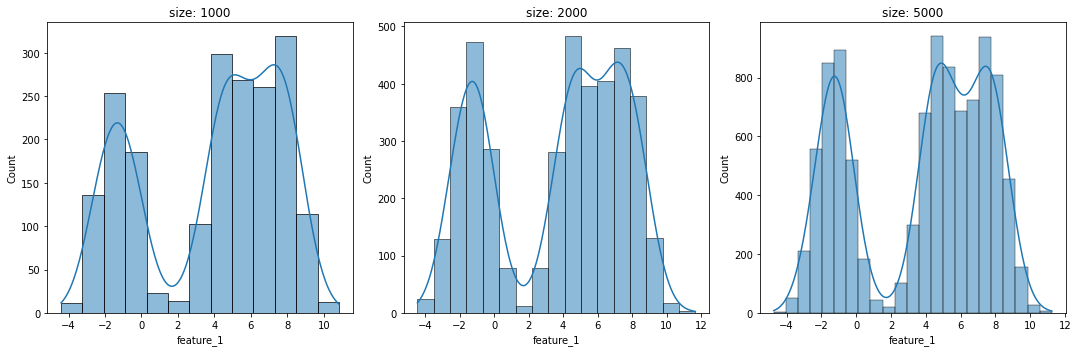

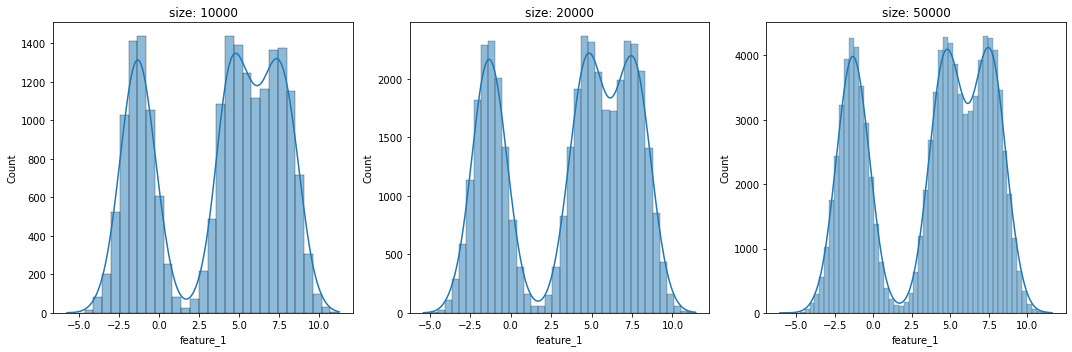

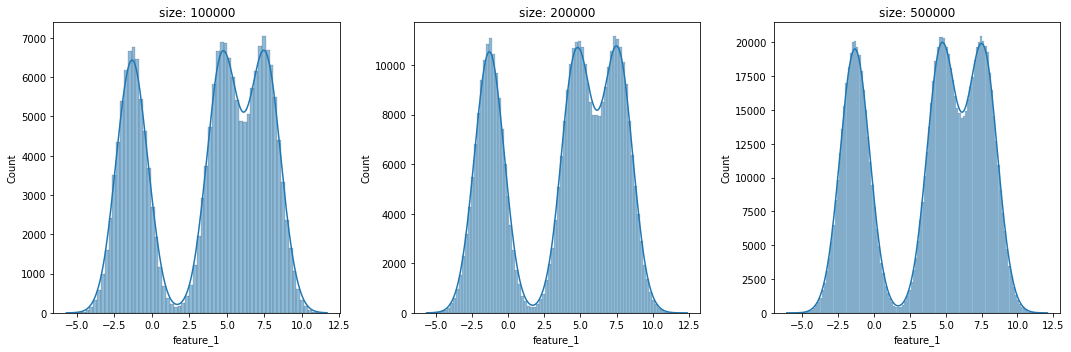

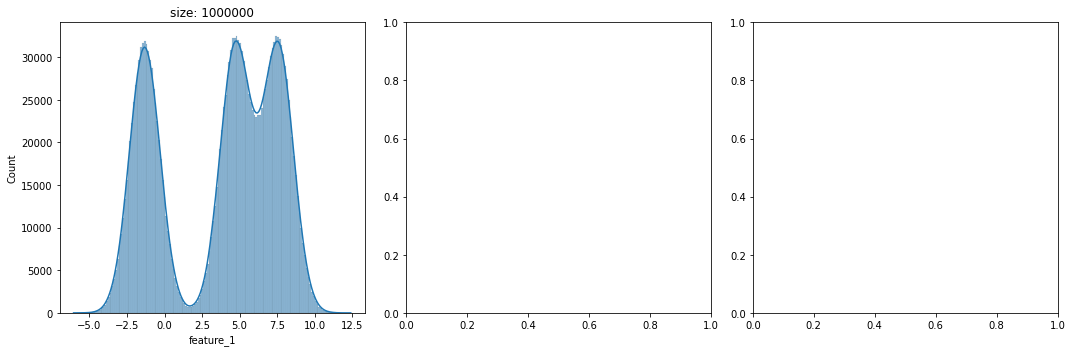

sns.kdeplot


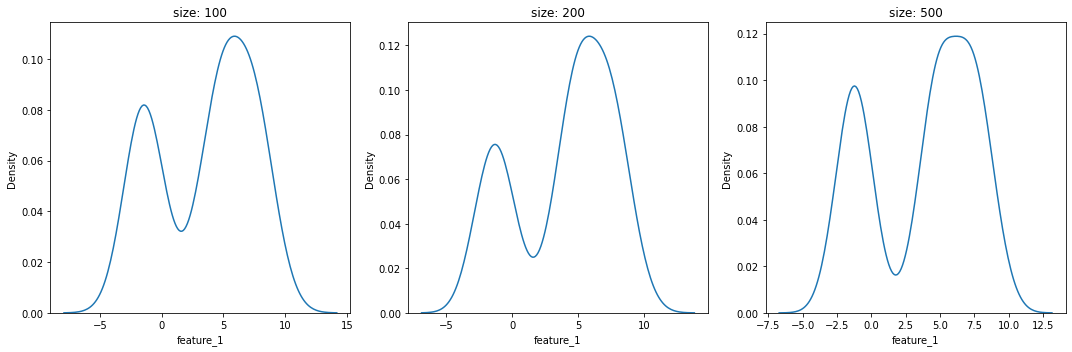

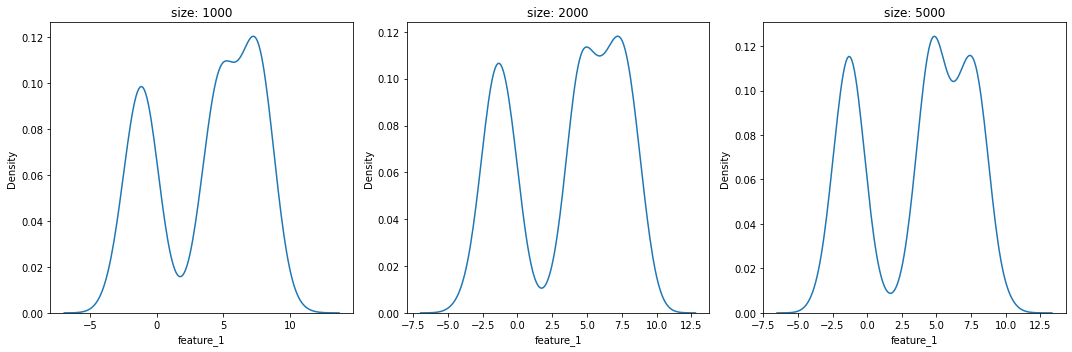

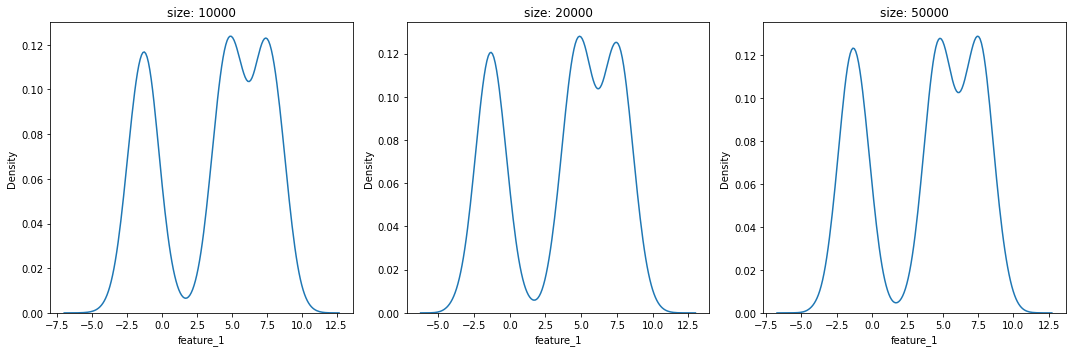

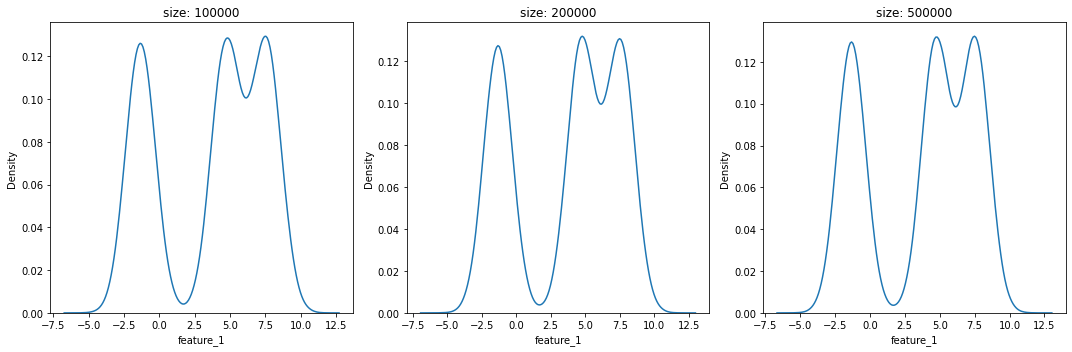

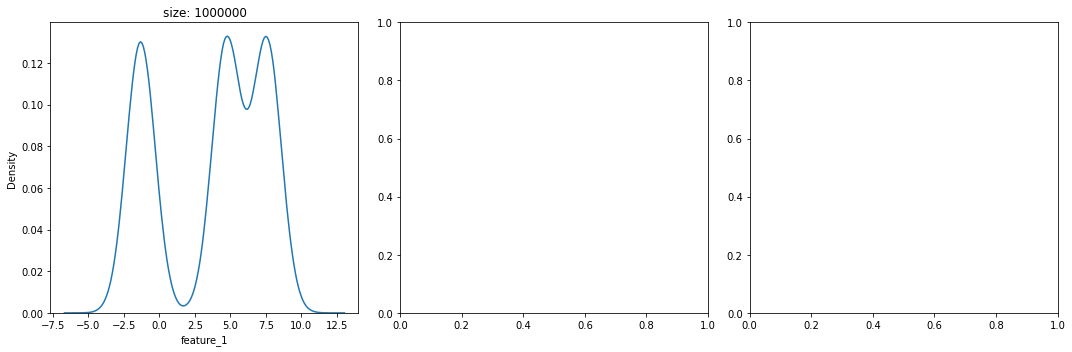

sns.rugplot


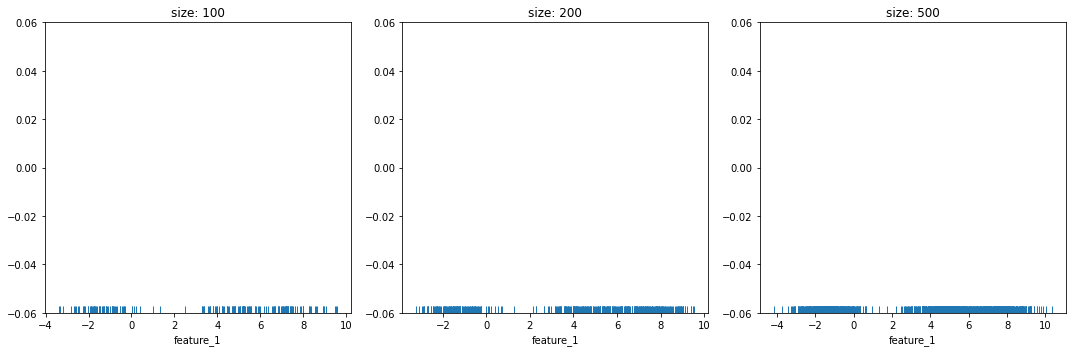

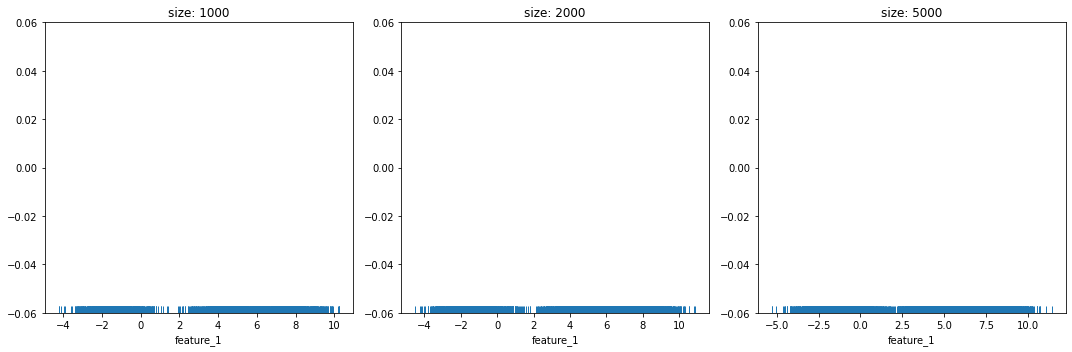

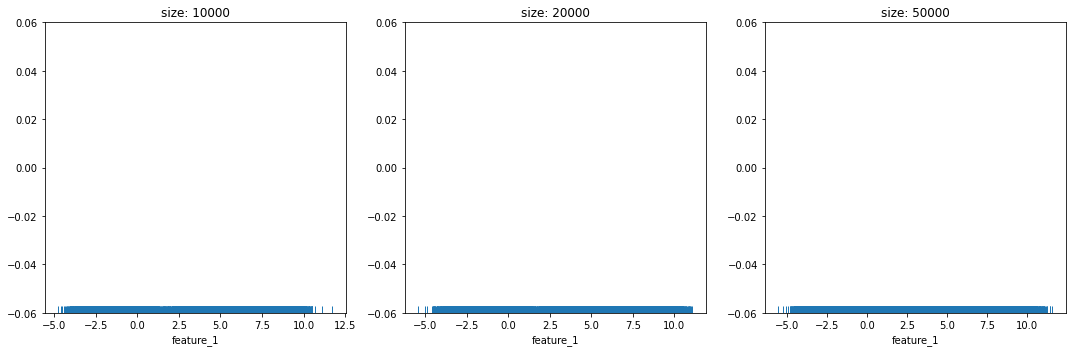

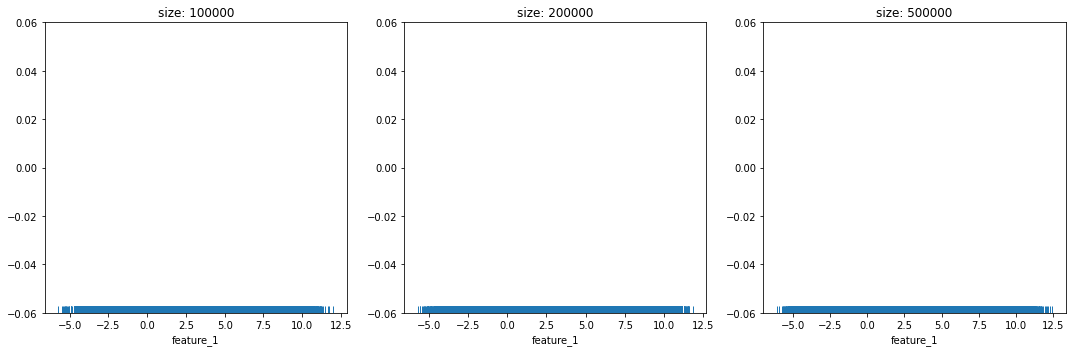

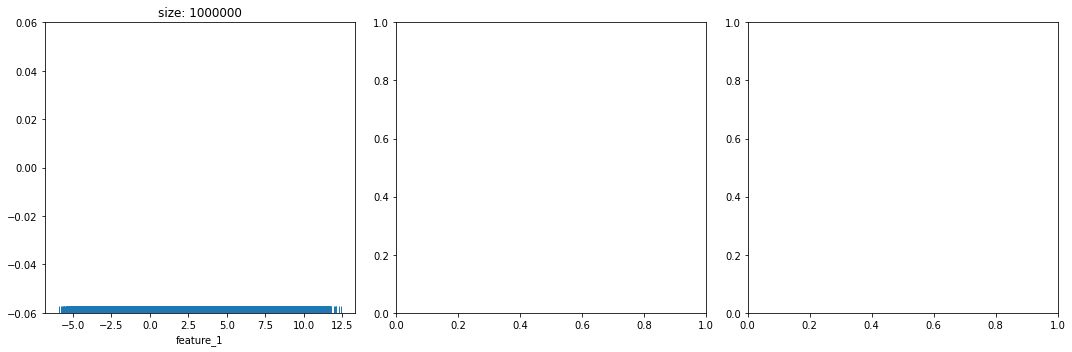

sns.swarmplot


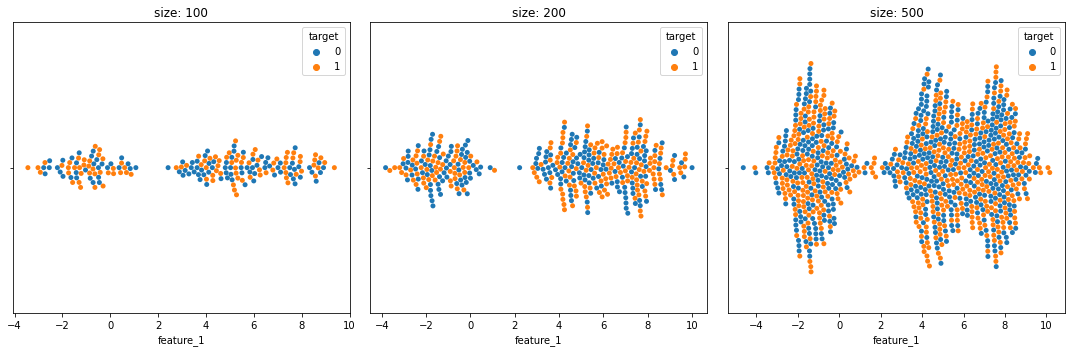

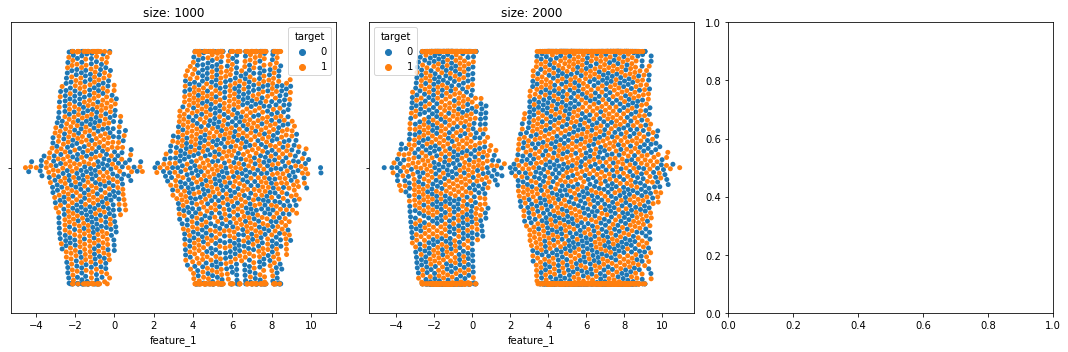

sns.stripplot


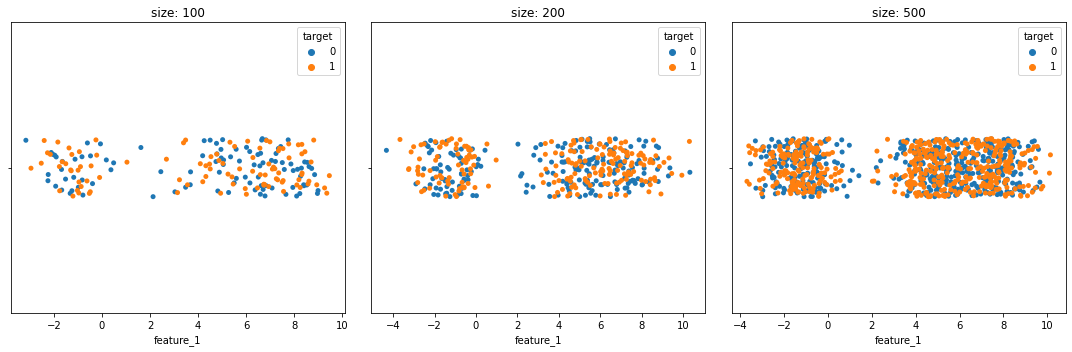

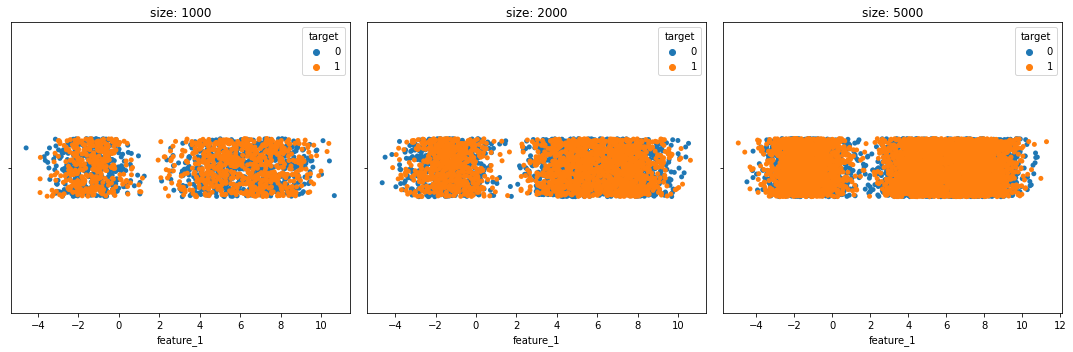

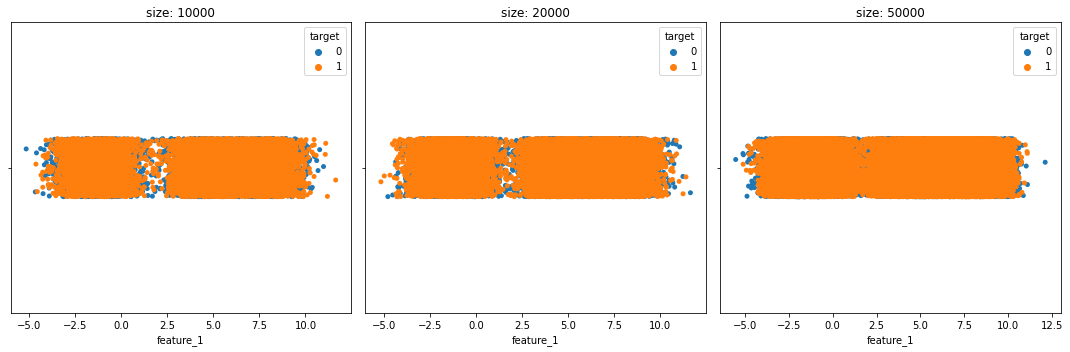

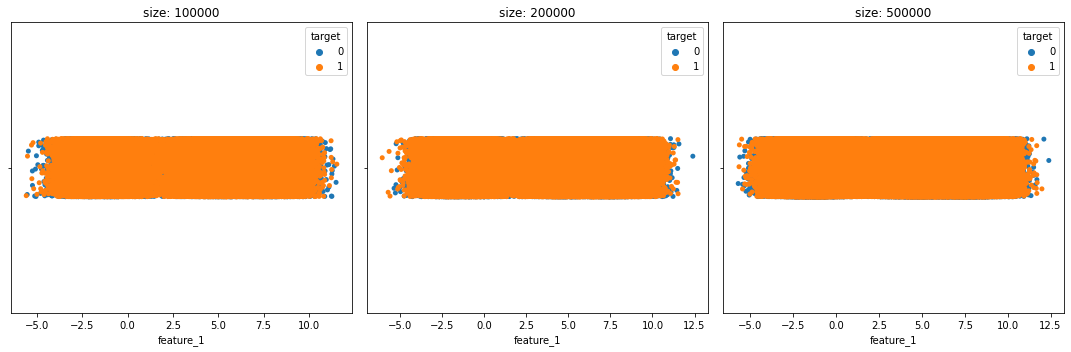

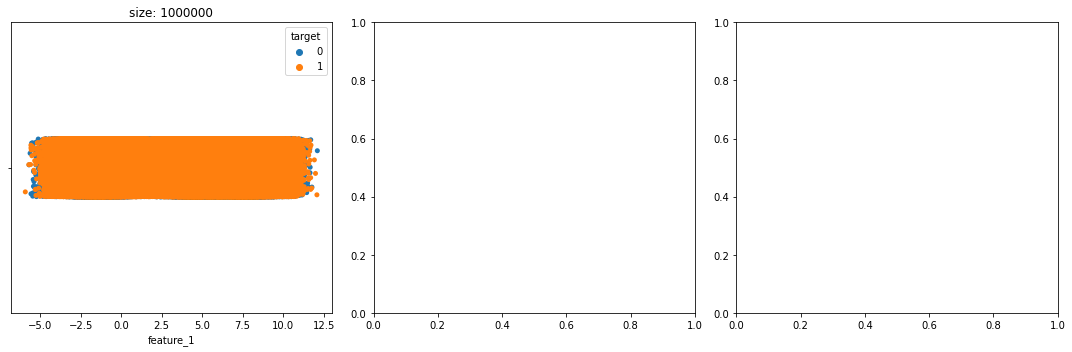

sns.boxplot


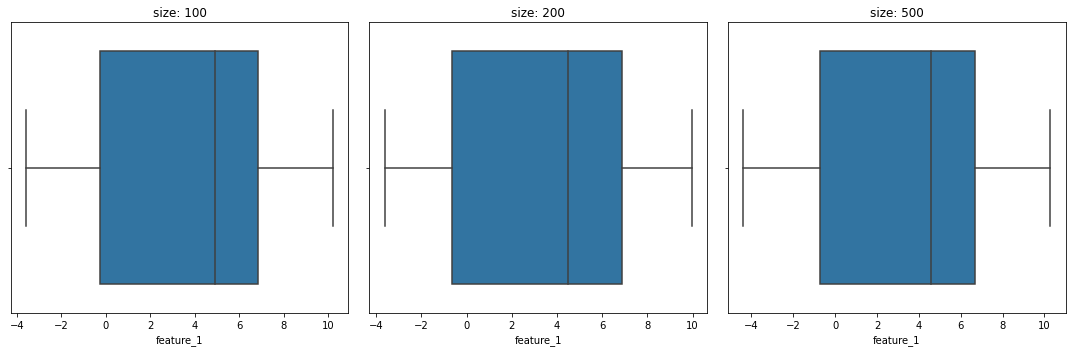

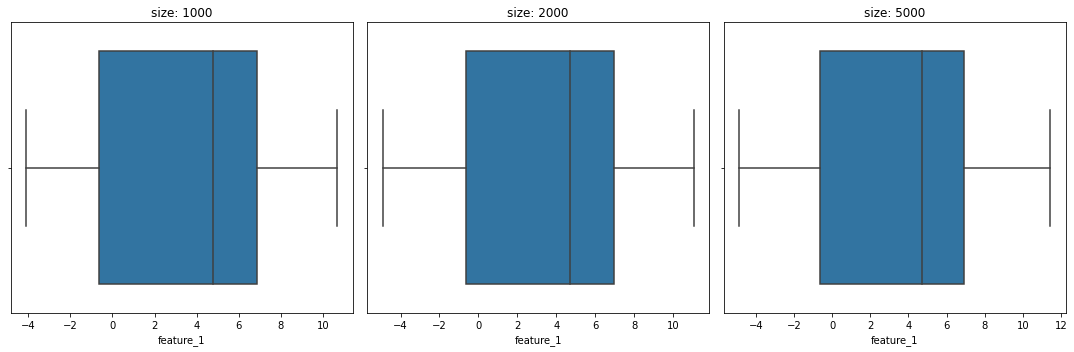

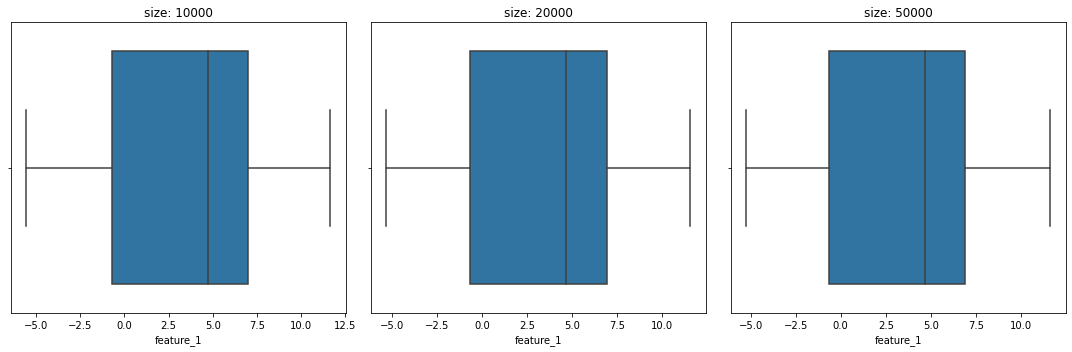

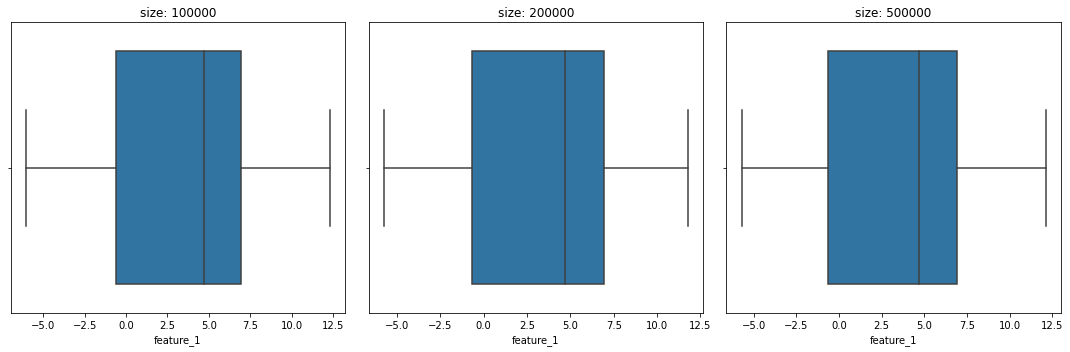

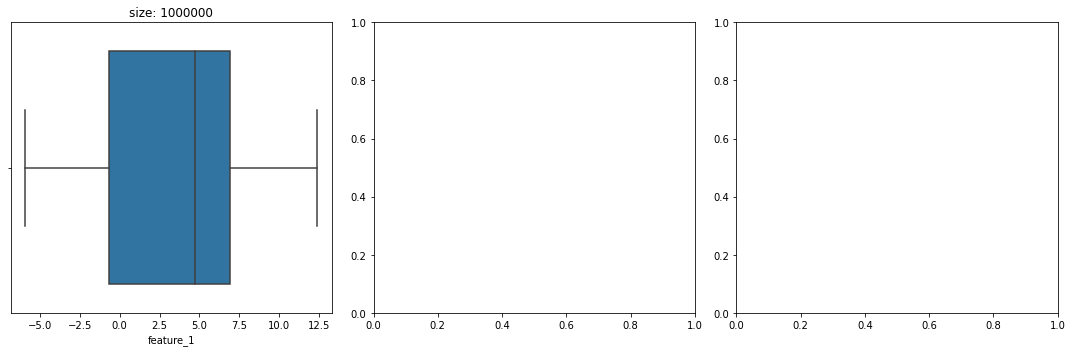

sns.boxenplot


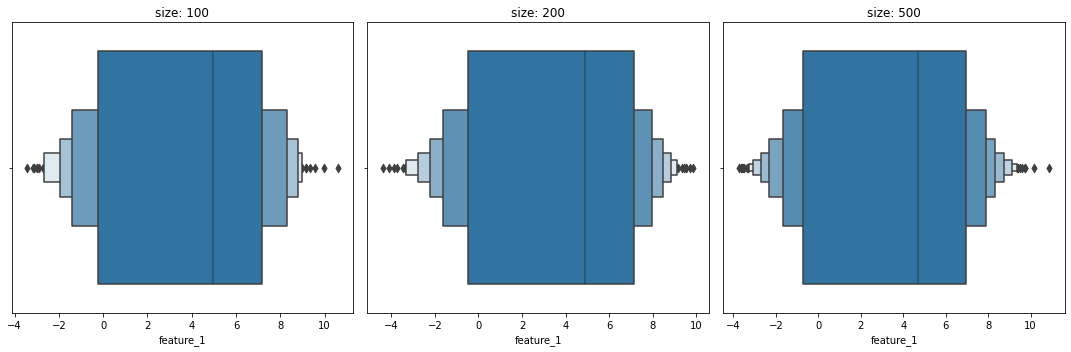

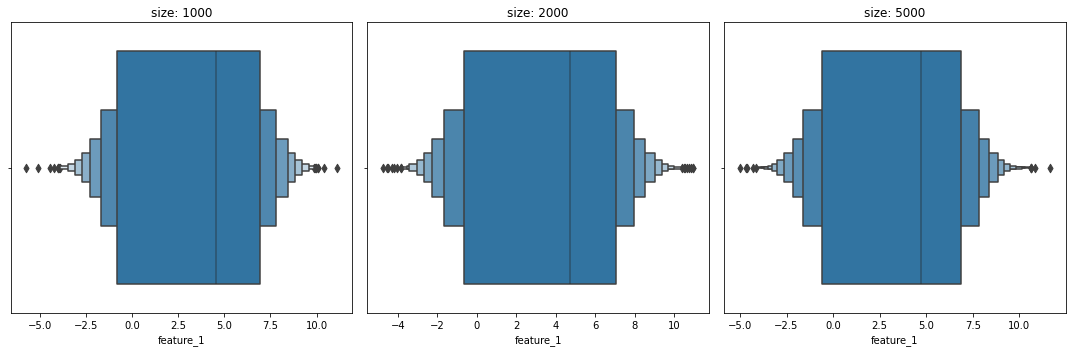

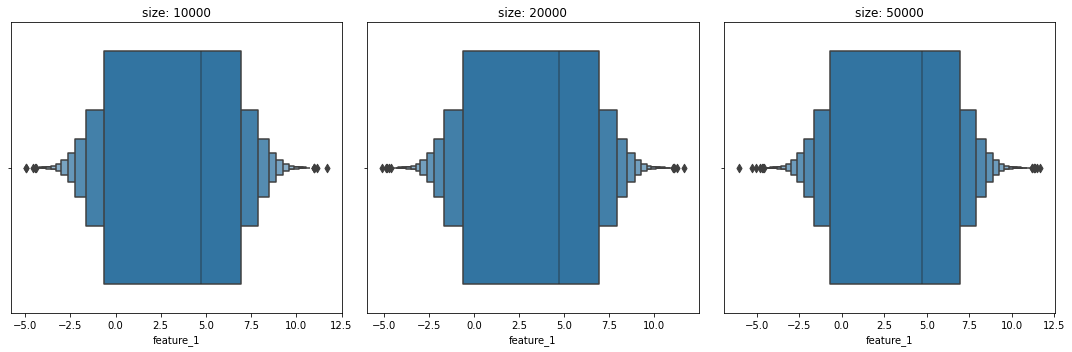

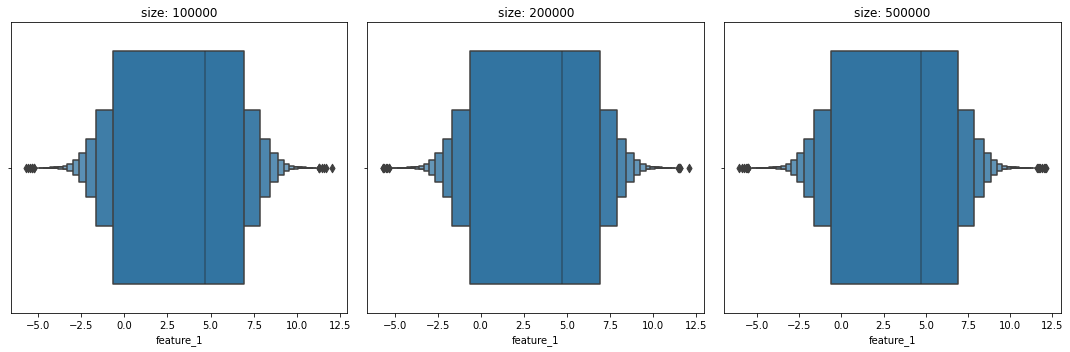

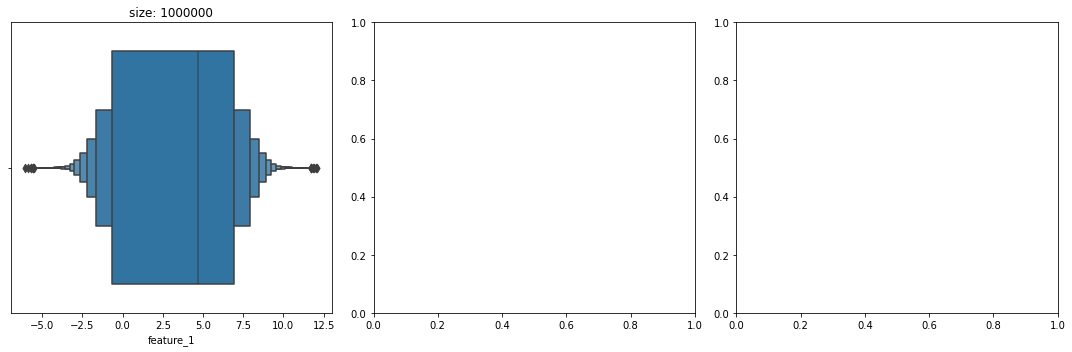

sns.countplot


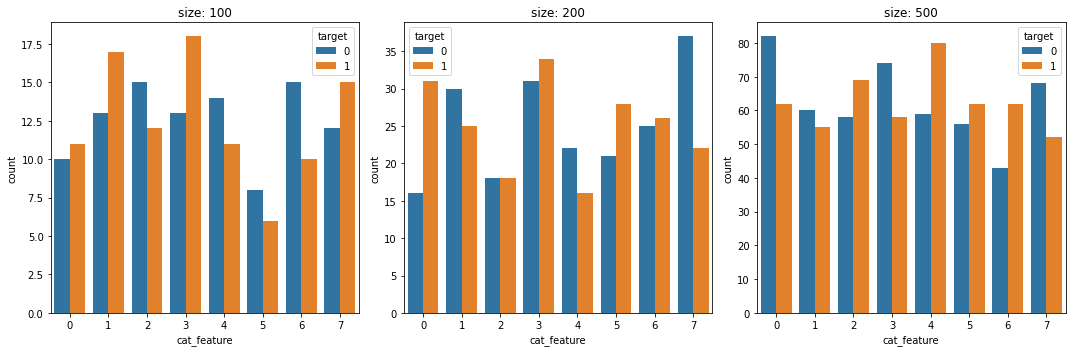

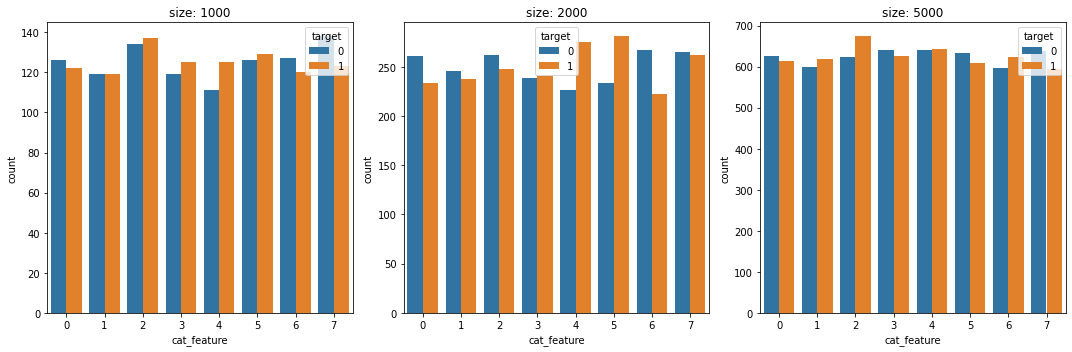

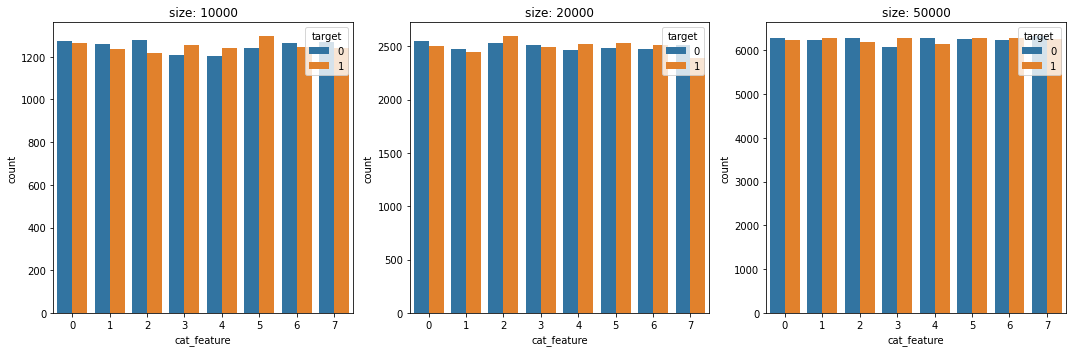

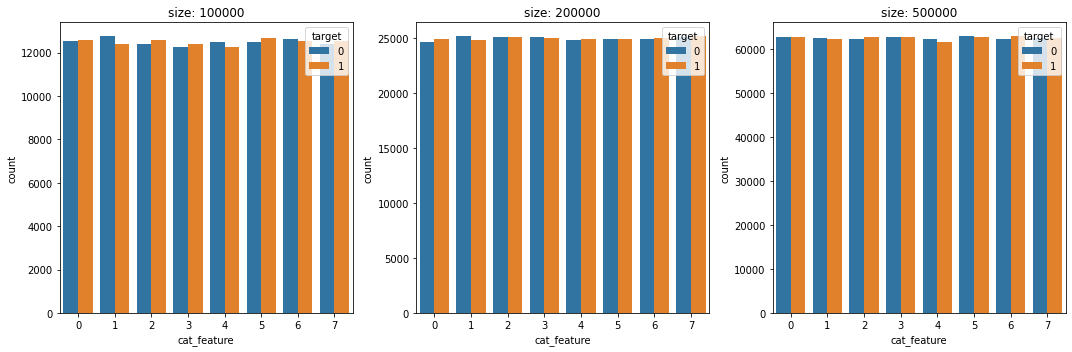

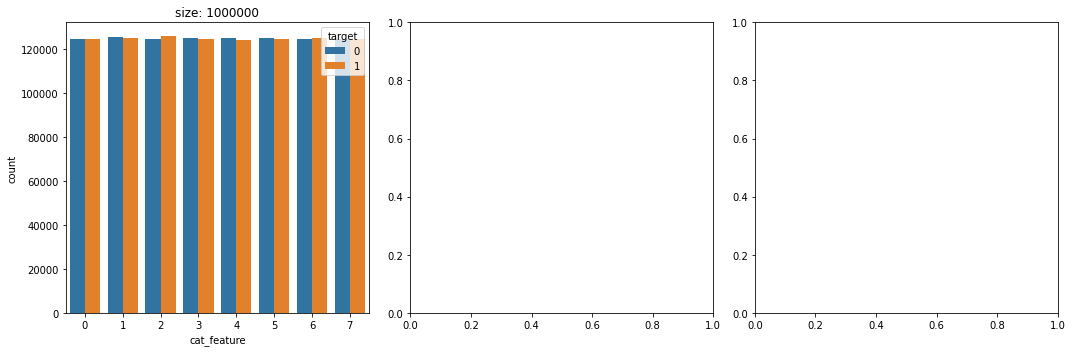

In [201]:
from functools import partial
from time import time as tm
from collections import defaultdict
import matplotlib.pyplot as plt

matplotlib.rcParams['agg.path.chunksize'] = 10000

import warnings
warnings.filterwarnings('ignore')

sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000]
plot_list = [
             partial(sns.lineplot, y='feature_1', x='time', ci=None, estimator=None, n_boot=0, sort=False),
             partial(sns.scatterplot, y='feature_1', x='time'),
             partial(sns.histplot, x='feature_1'),
             partial(sns.histplot, x='feature_1', kde=True),
             partial(sns.kdeplot, x='feature_1'),
             partial(sns.rugplot, x='feature_1'),
             partial(sns.swarmplot, x='feature_1', hue='target'),
             partial(sns.stripplot, x='feature_1', hue='target'),
             partial(sns.boxplot, x='feature_1', hue='target'),
             partial(sns.boxenplot, x='feature_1', hue='target'),
             partial(sns.countplot, x='cat_feature', hue='target')]
plot_names = [
             'sns.lineplot',
             'sns.scatterplot',
             'sns.histplot',
             'sns.histplot + kde',
             'sns.kdeplot',
             'sns.rugplot',
             'sns.swarmplot',
             'sns.stripplot',
             'sns.boxplot',
             'sns.boxenplot',
             'sns.countplot'
]
plots = zip(plot_names, plot_list)
grp = df.groupby('target')

res = defaultdict(list)
std = defaultdict(list)
limits = defaultdict(lambda:100)
limits['sns.swarmplot'] = 5

for name, plot in plots:
    print(name)
    fig, ax = plt.subplots(1, 3)
    for ax_num, size in enumerate(sizes[:limits[name]]):
        data = grp.sample(size)
        plt.subplot(1, 3, ax_num % 3 + 1)
        plt.gca().set_title(f'size: {size}')
        actual_time = %timeit -n1 -r1 -o -q plot(data=data)
        if ax_num % 3 == 2:
            fig.set_size_inches(15, 5)
            fig.tight_layout()
            plt.show()
            fig, ax = plt.subplots(1, 3)

        # print(name, size, actual_time.average)
        res[name].append(actual_time.average)
        std[name].append(actual_time.stdev)

    fig.set_size_inches(15, 5)
    fig.tight_layout()
    plt.show()
#     print(show_time)

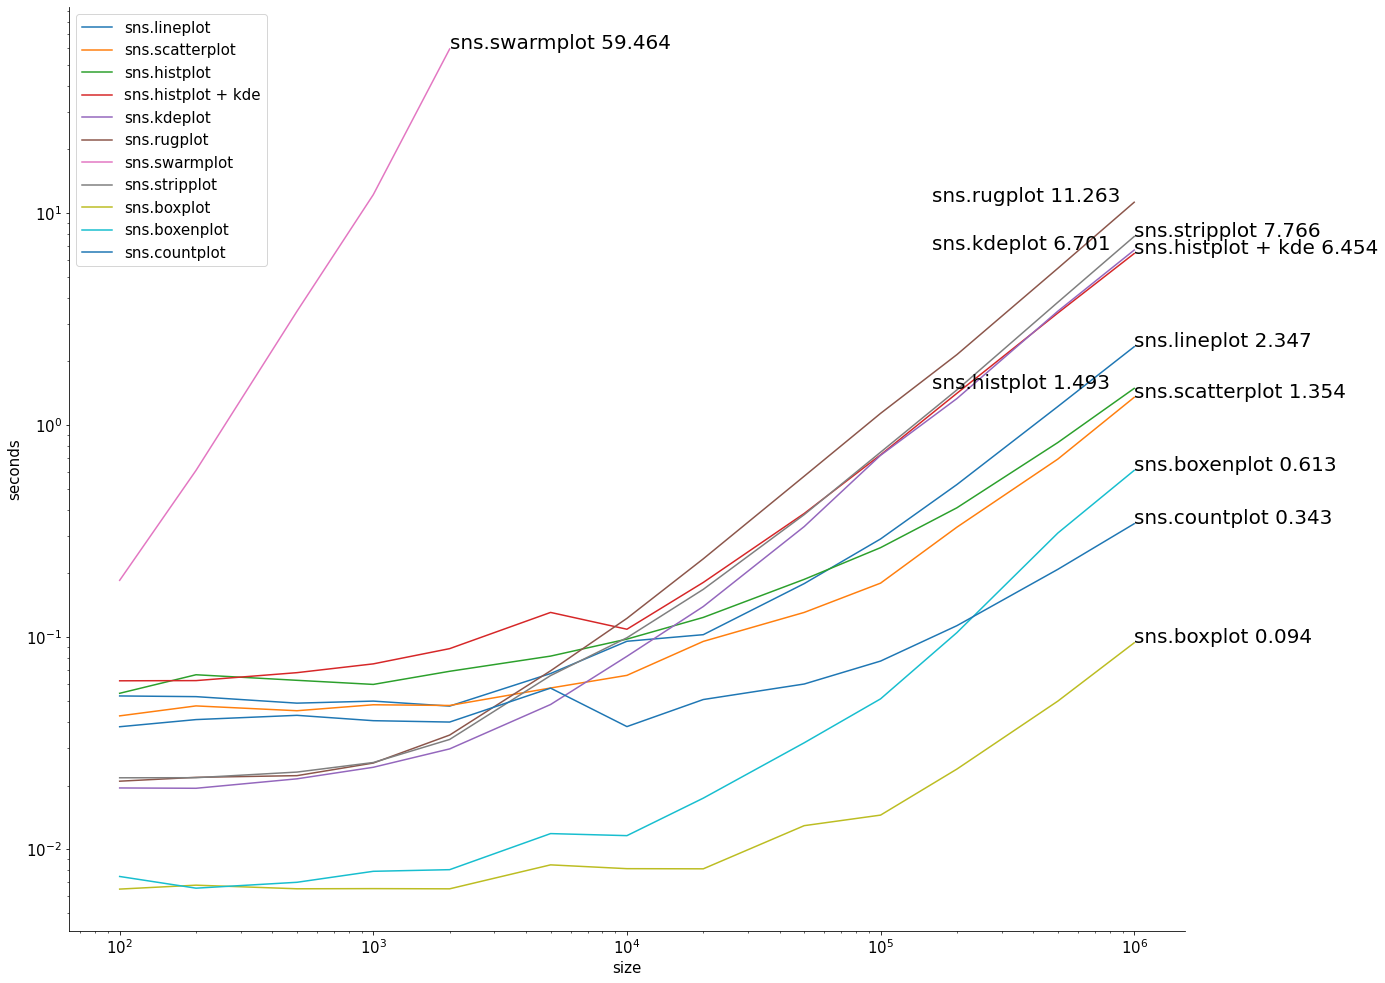

In [202]:
for i, name in enumerate(res):
    plt.plot(sizes[:limits[name]], res[name], label=name)
#     plt.fill_between(sizes[:limits[name]],
#                      np.array(res[name]) + np.array(std[name]),
#                      np.array(res[name]) - np.array(std[name]),
#                      alpha=.5, linewidth=0)
    
    plt.xlabel('size', fontsize=15)
    plt.ylabel('seconds', fontsize=15)
    move_names = ('sns.kdeplot', 'sns.rugplot', 'sns.histplot')
    modifier = 0 if name not in move_names else -840000

    plt.annotate(name + f' {round(res[name][-1], 3)}', xy=(sizes[:limits[name]][-1] + modifier, res[name][-1]),
                 fontsize=20)
    
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

plt.gcf().set_size_inches(20, 17)
sns.despine()

plt.show()

#### Заметки о типах данных в pandas

- `целочисленные типы pandas`

In [52]:
a = pd.Series([1, 2, np.nan, pd.NA]) # pd.NA и np.nan - разные вещи!
a

0       1
1       2
2     NaN
3    <NA>
dtype: object

In [53]:
# pd.Int.. поддерживает наны, но кастит все np.nan в pd.NA
Int16 = a.astype('Int16')
Int16

0       1
1       2
2    <NA>
3    <NA>
dtype: Int16

In [54]:
# pd.NA не особо дружит с numpy =(
a.astype(np.float32)

TypeError: float() argument must be a string or a number, not 'NAType'

In [55]:
# но
Int16.astype(np.float32)

0    1.0
1    2.0
2    NaN
3    NaN
dtype: float32

In [56]:
float32 = Int16.astype(np.float32)
float32

0    1.0
1    2.0
2    NaN
3    NaN
dtype: float32

In [57]:
Int64 = a.astype('Int64')
Int64

0       1
1       2
2    <NA>
3    <NA>
dtype: Int64

In [58]:
float32.info(memory_usage='deep')

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: None
Non-Null Count  Dtype  
--------------  -----  
2 non-null      float32
dtypes: float32(1)
memory usage: 144.0 bytes


In [59]:
Int16.info(memory_usage='deep')

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: None
Non-Null Count  Dtype
--------------  -----
2 non-null      Int16
dtypes: Int16(1)
memory usage: 140.0 bytes


In [60]:
Int64.info(memory_usage='deep')

<class 'pandas.core.series.Series'>
RangeIndex: 4 entries, 0 to 3
Series name: None
Non-Null Count  Dtype
--------------  -----
2 non-null      Int64
dtypes: Int64(1)
memory usage: 164.0 bytes


вывод: `pd.Int` поддерживает наны, кастит их в `pd.NA`, но занимает много места. `pd.NA` почти ни с кем не дружит, кроме pandas. Совет: не использовать `pd.Int`.

- `pd.to_numeric`

In [61]:
sales_global.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150049 entries, 0 to 3150048
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      float64       
 2   shop_id             int64         
 3   item_id             int64         
 4   item_price          float64       
 5   item_cnt_day        float64       
 6   item_name           object        
 7   item_category_id    int64         
 8   item_category_name  object        
 9   shop_name           object        
 10  data_class          object        
 11  ID                  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1.9 GB


In [62]:
sales_global.dtypes

date                  datetime64[ns]
date_block_num               float64
shop_id                        int64
item_id                        int64
item_price                   float64
item_cnt_day                 float64
item_name                     object
item_category_id               int64
item_category_name            object
shop_name                     object
data_class                    object
ID                           float64
dtype: object

In [63]:
tmp = sales_global.copy()
tmp.loc[:, tmp.dtypes == np.float64] = \
    tmp.loc[:, tmp.dtypes == np.float64].transform(pd.to_numeric, errors='raise', downcast='float')
tmp.loc[:, tmp.dtypes == np.int64] = \
    tmp.loc[:, tmp.dtypes == np.int64].transform(pd.to_numeric, errors='raise', downcast='integer')
tmp.info(memory_usage='deep')

/var/folders/_n/1hp8tw4x1q7643t9r3kzzksn_m62s3/T/ipykernel_59156/3136078783.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tmp.loc[:, tmp.dtypes == np.float64] = \
/var/folders/_n/1hp8tw4x1q7643t9r3kzzksn_m62s3/T/ipykernel_59156/3136078783.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tmp.loc[:, tmp.dtypes == np.int64] = \


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150049 entries, 0 to 3150048
Data columns (total 12 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      float32       
 2   shop_id             int8          
 3   item_id             int16         
 4   item_price          float64       
 5   item_cnt_day        float32       
 6   item_name           object        
 7   item_category_id    int8          
 8   item_category_name  object        
 9   shop_name           object        
 10  data_class          object        
 11  ID                  float32       
dtypes: datetime64[ns](1), float32(3), float64(1), int16(1), int8(2), object(4)
memory usage: 1.8 GB


- `csv` vs `parquet`

In [64]:
tmp['cat_col'] = tmp.shop_name.astype('category')
tmp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150049 entries, 0 to 3150048
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      float32       
 2   shop_id             int8          
 3   item_id             int16         
 4   item_price          float64       
 5   item_cnt_day        float32       
 6   item_name           object        
 7   item_category_id    int8          
 8   item_category_name  object        
 9   shop_name           object        
 10  data_class          object        
 11  ID                  float32       
 12  cat_col             category      
dtypes: category(1), datetime64[ns](1), float32(3), float64(1), int16(1), int8(2), object(4)
memory usage: 1.8 GB


In [65]:
csv_write_time = %timeit -o -q -n1 -r1 tmp.to_csv('tmp.csv', index=False)

from time import time as tm

start_time = tm()
tmp_from_csv = pd.read_csv('tmp.csv')
csv_read_time = tm() - start_time

tmp_from_csv.info(memory_usage='deep')

/var/folders/_n/1hp8tw4x1q7643t9r3kzzksn_m62s3/T/ipykernel_59156/1575114287.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_from_csv = pd.read_csv('tmp.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150049 entries, 0 to 3150048
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   date_block_num      float64
 2   shop_id             int64  
 3   item_id             int64  
 4   item_price          float64
 5   item_cnt_day        float64
 6   item_name           object 
 7   item_category_id    int64  
 8   item_category_name  object 
 9   shop_name           object 
 10  data_class          object 
 11  ID                  float64
 12  cat_col             object 
dtypes: float64(4), int64(3), object(6)
memory usage: 2.1 GB


In [66]:
csv_write_time.average, csv_read_time

(23.400079032000008, 6.150000810623169)

In [67]:
parquet_write_time = %timeit -o -q -n1 -r1 tmp.to_parquet('tmp.parquet', index=False)

start_time = tm()
tmp_from_parquet = pd.read_parquet('tmp.parquet')
parquet_read_time = tm() - start_time

tmp_from_parquet.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150049 entries, 0 to 3150048
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   date                datetime64[ns]
 1   date_block_num      float32       
 2   shop_id             int8          
 3   item_id             int16         
 4   item_price          float64       
 5   item_cnt_day        float32       
 6   item_name           object        
 7   item_category_id    int8          
 8   item_category_name  object        
 9   shop_name           object        
 10  data_class          object        
 11  ID                  float32       
 12  cat_col             category      
dtypes: category(1), datetime64[ns](1), float32(3), float64(1), int16(1), int8(2), object(4)
memory usage: 1.5 GB


In [68]:
parquet_write_time.average, parquet_read_time

(2.6179159029999823, 1.0769238471984863)

вывод: не используйте `csv`, для внутренней работы с данными ("для себя")!